In [ ]:
!pip install prometheus-api-client

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import networkx as nx
import raphtory as rp
import datetime
from dateutil.relativedelta import relativedelta
from prometheus_api_client import PrometheusConnect, MetricsList, Metric, MetricSnapshotDataFrame, MetricRangeDataFrame
#prom = PrometheusConnect(url ="http://172.189.51.189:80", disable_ssl=True)
prom = PrometheusConnect(url ="http://4.178.243.119:9090", disable_ssl=True)

#prom = PrometheusConnect(url ="http://raphtory03:9090", disable_ssl=True)
#prom = PrometheusConnect(url ="http://localhost:8080", disable_ssl=True)
#prom = PrometheusConnect(url ="http://raphtory03:10000", disable_ssl=True)


In [2]:
#Print all possible metricspppl to monitor from prometheus
prom.all_metrics()

['ALERTS',
 'ALERTS_FOR_STATE',
 'aggregator_discovery_aggregation_count_total',
 'aggregator_unavailable_apiservice',
 'aggregator_unavailable_apiservice_total',
 'apiextensions_apiserver_validation_ratcheting_seconds_bucket',
 'apiextensions_apiserver_validation_ratcheting_seconds_count',
 'apiextensions_apiserver_validation_ratcheting_seconds_sum',
 'apiextensions_openapi_v2_regeneration_count',
 'apiextensions_openapi_v3_regeneration_count',
 'apiserver_admission_controller_admission_duration_seconds_bucket',
 'apiserver_admission_controller_admission_duration_seconds_count',
 'apiserver_admission_controller_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_bucket',
 'apiserver_admission_step_admission_duration_seconds_count',
 'apiserver_admission_step_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_summary',
 'apiserver_admission_step_admission_duration_seconds_summary_count',
 'apiserver_admission_step_a

In [31]:
#### Let's define a start time for collecting monitred data Prometheus time= Local time - 1 hour .
#Here we put the local time
start="2025-05-04 16:00:28"
end="2025-05-04 16:10:29"
start = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
end = datetime.datetime.strptime(end, "%Y-%m-%d %H:%M:%S")
print("Start: ", start, "End: ", end)

Start:  2025-05-04 16:00:28 End:  2025-05-04 16:10:29


In [32]:
#This function will generate windows of size minute_size between start and end times
def generete_windows(start,end, minute_size):
    #start_time = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
    #end_time = datetime.datetime.strptime(end, "%Y-%m-%d %H:%M:%S")
    #start_date = datetime.datetime.strptime("2025-01-14 17:06:56", "%Y-%m-%d %H:%M:%S")
    #end_date = datetime.datetime.strptime("2025-01-14 23:51:55", "%Y-%m-%d %H:%M:%S")

    minutes_diff = (end - start).total_seconds() / 60.0
    #minutes_diff = (end - start).total_seconds()
    window_mimutes_size=minute_size
    number_of_windows = int(minutes_diff//window_mimutes_size)
    print(number_of_windows)


    # initializing dates
    window_generated = pd.date_range(start, end, periods=number_of_windows+1)
    #print(type(window_generated))
    print(window_generated.strftime("%Y-%m-%d %H:%M:%S"))
    return window_generated,number_of_windows
window_generated,number_of_windows=generete_windows(start,end, 1)

10
Index(['2025-05-04 16:00:28', '2025-05-04 16:01:28', '2025-05-04 16:02:28',
       '2025-05-04 16:03:28', '2025-05-04 16:04:28', '2025-05-04 16:05:28',
       '2025-05-04 16:06:28', '2025-05-04 16:07:28', '2025-05-04 16:08:28',
       '2025-05-04 16:09:28', '2025-05-04 16:10:29'],
      dtype='object')


In [14]:
# mergedData1 = pd.merge(a, b, on=['timestamp','source_workload', 'destination_workload','request_protocol','response_flags','reporter', 'node','response_code','grpc_response_status'], how='inner')
# mergedData1.to_csv('istio_request_1.csv', index=True)
# mergedData2 = pd.merge(mergedData1, c, on=['timestamp','source_workload', 'destination_workload','request_protocol','response_flags','reporter', 'node','response_code','grpc_response_status'], how='inner')


# mergedData2 = mergedData2.loc[:,~mergedData2.columns.duplicated()].copy()
# mergedData2.to_csv('istio_request_v3.csv', index=True)

In [15]:
#################################################  Part 1 ########################################################

In [16]:
#############################################get the data in timeseries with rate##############################################

In [17]:
##################################################################################################################

In [18]:
##################################################################################################################

In [38]:
def collect_metrics(start_time, end_time, metric, namespace):
    # Connect to Prometheus
    #prom = PrometheusConnect(url=prom, disable_ssl=True)
    
    # Convert string timestamps to datetime objects
    #start_dt = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    #end_dt = datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S")
    
    # Collect CPU metrics
    metric_query = f'sum(rate({metric}{{namespace="{namespace}", container!="POD", container!=""}}[1m])) by (pod,instance)'
    metric_data = prom.custom_query_range(
        query=metric_query,
        start_time=start_time,
        end_time=end_time,
        step="1s"
    )
    metric_df = MetricRangeDataFrame(metric_data)
    #print(metric_df.head(10))
    
    metric_df = metric_df[['instance','pod', 'value']].rename(columns={'value': metric})
    return metric_df

container_memory_working_set_bytes=collect_metrics(start,end,'container_memory_working_set_bytes', 'ob')
container_memory_working_set_bytes.head(30)

container_cpu_usage_seconds_total=collect_metrics(start,end,'container_cpu_usage_seconds_total', 'ob')
container_cpu_usage_seconds_total.head(30)
#unique_nodes = container_cpu_usage_seconds_total['instance'].unique()
#print(unique_nodes)



,instance,pod,container_cpu_usage_seconds_total
timestamp,,,
2025-05-04 14:50:37,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002275
2025-05-04 14:50:38,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002559
2025-05-04 14:50:37,aks-agentpool-42554999-vmss00000x,checkoutservice-578fc9b8b-bxdmb,0.002265
2025-05-04 14:50:38,aks-agentpool-42554999-vmss00000x,checkoutservice-578fc9b8b-bxdmb,0.002265
2025-05-04 14:50:37,aks-agentpool-42554999-vmss00000x,emailservice-65d769fc6b-s7cgn,0.003238
2025-05-04 14:50:38,aks-agentpool-42554999-vmss00000x,emailservice-65d769fc6b-s7cgn,0.003238
2025-05-04 14:50:37,aks-agentpool-42554999-vmss00000x,paymentservice-7c5747c7cd-gkvnv,0.002375
2025-05-04 14:50:38,aks-agentpool-42554999-vmss00000x,paymentservice-7c5747c7cd-gkvnv,0.002375
2025-05-04 14:50:37,aks-agentpool-42554999-vmss00000x,redis-cart-85dd766597-xsktp,0.006420


In [210]:
#start="2025-05-04 16:00:28"
#end="2025-05-04 16:10:29"

end=datetime.datetime.now()
start = end - datetime.timedelta(seconds=30)
#start = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
#end = datetime.datetime.strptime(end, "%Y-%m-%d %H:%M:%S")
print("Start: ", start, "End: ", end)

container_cpu_usage_seconds_total=collect_metrics(start,end,'container_cpu_usage_seconds_total', 'ob')
container_cpu_usage_seconds_total.head(30)



Start:  2025-05-04 17:04:25.690674 End:  2025-05-04 17:04:55.690674


,instance,pod,container_cpu_usage_seconds_total
timestamp,,,
2025-05-04 15:04:26,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002653
2025-05-04 15:04:27,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002656
2025-05-04 15:04:28,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002656
2025-05-04 15:04:29,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002656
2025-05-04 15:04:30,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002656
2025-05-04 15:04:31,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002656
2025-05-04 15:04:32,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002656
2025-05-04 15:04:33,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002655
2025-05-04 15:04:34,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,0.002652


In [211]:
container_memory_working_set_bytes=collect_metrics(start,end,'container_memory_working_set_bytes', 'ob')
container_memory_working_set_bytes.head(30)
container_memory_working_set_bytes.to_csv('ab.csv', index=True)

In [212]:
def collect_metrics_net(start_time, end_time, metric, namespace): # Connect to Prometheus #prom = PrometheusConnect(url=prom, disable_ssl=True)

    # Convert string timestamps to datetime objects
    #start_dt = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    #end_dt = datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S")

    # Collect CPU metrics
    net_query = f'sum(rate({metric}{{namespace="{namespace}"}}[1m])) by (pod,instance)'
    net_data = prom.custom_query_range(
        query=net_query,
        start_time=start_time,
        end_time=end_time,
        step="1s"
    )
    net_df = MetricRangeDataFrame(net_data)
    net_df = net_df[['instance','pod', 'value']].rename(columns={'value': metric})
    return net_df
net=collect_metrics_net(start,end, 'container_network_receive_bytes_total','ob') 
net.head(30)

,instance,pod,container_network_receive_bytes_total
timestamp,,,
2025-05-04 15:04:26,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,155.225903
2025-05-04 15:04:27,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:28,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:29,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:30,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:31,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:32,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:33,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734
2025-05-04 15:04:34,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,168.851734


In [213]:
container_cpu_usage_seconds_total=collect_metrics(start,end,'container_cpu_usage_seconds_total', 'ob')
container_cpu_system_seconds_total=collect_metrics(start,end,'container_cpu_system_seconds_total', 'ob')

container_memory_working_set_bytes=collect_metrics(start,end,'container_memory_working_set_bytes', 'ob')
container_memory_rss=collect_metrics(start,end,'container_memory_rss', 'ob')

container_network_receive_bytes_total=collect_metrics_net(start,end,'container_network_receive_bytes_total', 'ob')
container_network_transmit_packets_total=collect_metrics_net(start,end,'container_network_transmit_packets_total', 'ob')




In [214]:

cpu = pd.merge(container_cpu_usage_seconds_total, container_cpu_system_seconds_total,
                       on=['timestamp','pod','instance'],
                       how='inner')
                       #suffixes=('_cpu', '_mem1'))

mem = pd.merge(container_memory_working_set_bytes, container_memory_rss,
                       on=['timestamp','pod','instance'],
                       how='inner')
                       #suffixes=('', '_mem2'))

net = pd.merge(container_network_receive_bytes_total, container_network_transmit_packets_total,
                       on=['timestamp','pod','instance'],
                       how='inner')



cpumem = pd.merge(cpu, mem,
                       on=['timestamp','pod','instance'],
                       how='inner')
                       #suffixes=('_cpu', '_mem1'))

cpumemnet = pd.merge(cpumem, net,
                       on=['timestamp','pod','instance'],
                       how='inner')
                       #suffixes=('_cpu', '_mem1'))

cpumemnet.head(10)
cpumemnet.to_csv('resource_consumption.csv', index=True)
#print(len(mem),len(cpu),len(net),len(cpumemnet))

In [215]:
import pandas as pd

# Let's assume your original DataFrame is called df
# and timestamp is already set as the index

metrics = ['container_cpu_usage_seconds_total', 'container_memory_working_set_bytes', 'container_network_transmit_packets_total']

# Move the index back to a column temporarily
cpumemnet = cpumemnet.reset_index()

# Add a 'deployed_at' column (duplicate of node_name)
cpumemnet['deployed_at'] = cpumemnet['instance']

# Melt the DataFrame
df_melted = pd.melt(cpumemnet, 
                    id_vars=['timestamp', 'pod'], 
                    value_vars=metrics + ['deployed_at'], 
                    var_name='metric', 
                    value_name='value')

# Create new column names like pod-metric
df_melted['column'] = df_melted['pod'] + '_' + df_melted['metric']

# Pivot to wide format (so each pod and metric combination gets its own column)
df_pivot = df_melted.pivot_table(index='timestamp', 
                                 columns='column', 
                                 values='value', 
                                 aggfunc='first').reset_index()

# Sort the columns alphabetically except for timestamp
columns = ['timestamp'] + sorted([col for col in df_pivot.columns if col != 'timestamp'])
df_pivot = df_pivot[columns]

# Print the final DataFrame
print(df_pivot)

df_pivot.to_csv('baro_similar_resource.csv', index=True)

column           timestamp  \
0      2025-05-04 15:04:26   
1      2025-05-04 15:04:27   
2      2025-05-04 15:04:28   
3      2025-05-04 15:04:29   
4      2025-05-04 15:04:30   
5      2025-05-04 15:04:31   
6      2025-05-04 15:04:32   
7      2025-05-04 15:04:33   
8      2025-05-04 15:04:34   
9      2025-05-04 15:04:35   
10     2025-05-04 15:04:36   
11     2025-05-04 15:04:37   
12     2025-05-04 15:04:38   
13     2025-05-04 15:04:39   
14     2025-05-04 15:04:40   
15     2025-05-04 15:04:41   
16     2025-05-04 15:04:42   
17     2025-05-04 15:04:43   
18     2025-05-04 15:04:44   
19     2025-05-04 15:04:45   
20     2025-05-04 15:04:46   
21     2025-05-04 15:04:47   
22     2025-05-04 15:04:48   
23     2025-05-04 15:04:49   
24     2025-05-04 15:04:50   
25     2025-05-04 15:04:51   
26     2025-05-04 15:04:52   
27     2025-05-04 15:04:53   
28     2025-05-04 15:04:54   
29     2025-05-04 15:04:55   
30     2025-05-04 15:04:56   

column adservice-5dc4c759b6-b9dwc_conta

In [216]:
#################################################  Part 2 ########################################################

In [217]:
####################################### get the data in timeseries without rate #############################################

In [218]:
##################################################################################################################

In [219]:
##################################################################################################################

In [220]:
#Functions for Istio metrics collection
ns="ob"
def gen_metric(metric,start,end,freq):
    #To avoid getting duplicate data, we beed separate query for each response code
    a=prom.custom_query_range(metric+'{namespace="ob",}',start, end,freq)
    #a=prom.custom_query_range(metric+'{namespace='+ns+',}',start, end,freq)
    #print(a)
    metric_df  = MetricRangeDataFrame(a)
    metric_df=metric_df[['instance', 'pod', 'container','value']]
    #metric_df = metric_df[metric_df['container'] != '']
    metric_df = metric_df[metric_df['container'].notna()]
    metric_df=metric_df.drop_duplicates()
    metric_df = metric_df.drop(metric_df[metric_df['container'] == 'istio-proxy'].index)
    metric_df = metric_df[~metric_df['pod'].str.startswith('load')]
    metric_df = metric_df[~metric_df['pod'].str.startswith('redis')]
    #metric_df = metric_df[~metric_df['pod'].str.startswith('front')]
    
    metric_df.rename(columns={'value':metric}, inplace=True)
    #metric_df = metric_df.sort_values(by=['timestamp', 'pod'], ascending=[True, True], na_position='last')
    metric_df = metric_df.sort_values(by=['pod','timestamp'], ascending=[True, True], na_position='last')

    #mergedData0.to_csv(name, index=True)
    return metric_df


In [221]:
#mergedData0=gen_metric('container_cpu_system_seconds_total',start,end,1)
mergedData0=gen_metric('container_cpu_usage_seconds_total',start,end,1)
mergedData0.to_csv('container_cpu_usage_seconds_total.csv', index=True)
mergedData0.head(20)

,instance,pod,container,container_cpu_usage_seconds_total
timestamp,,,,
2025-05-04 15:04:27,aks-agentpool-42554999-vmss00000x,adservice-5dc4c759b6-b9dwc,server,42.166808
2025-05-04 15:04:43,aks-agentpool-42554999-vmss000018,cartservice-7f84c9f647-9rqng,server,116.587489
2025-05-04 15:04:56,aks-agentpool-42554999-vmss000018,cartservice-7f84c9f647-9rqng,server,116.590118
2025-05-04 15:04:29,aks-agentpool-42554999-vmss00000x,checkoutservice-578fc9b8b-bxdmb,server,8.261499
2025-05-04 15:04:45,aks-agentpool-42554999-vmss00000x,emailservice-65d769fc6b-s7cgn,server,47.815544
2025-05-04 15:04:52,aks-agentpool-42554999-vmss00000x,paymentservice-7c5747c7cd-gkvnv,server,12.302764
2025-05-04 15:04:27,aks-agentpool-42554999-vmss00000y,productcatalogservice-8585c7859d-mmxws,server,7.919995
2025-05-04 15:04:45,aks-agentpool-42554999-vmss00000y,productcatalogservice-8585c7859d-mmxws,server,7.922435
2025-05-04 15:04:29,aks-agentpool-42554999-vmss00000y,shippingservice-84b8587c8d-tmw9p,server,12.990334


In [222]:
mergedData1=gen_metric('container_cpu_system_seconds_total',start,end,1)
mergedData1.to_csv('container_cpu_system_seconds_total.csv', index=True)
mergedData1.head(30)
print(len(mergedData1))

8


In [223]:
cpu_data = pd.merge(mergedData0, mergedData1,
                       on=['timestamp','instance','pod','container'],
                       how='inner')
                       #suffixes=('_cpu', '_mem1'))
cpu_data.head(10)
print(len(cpu_data))

8


In [224]:
mergedData2=gen_metric('container_memory_working_set_bytes',start,end,1)
mergedData2.to_csv('container_memory_working_set_bytes.csv', index=True)
mergedData2.head(30)
print(len(mergedData2))

7


In [225]:
mergedData3=gen_metric('container_memory_rss',start,end,1)
mergedData3.to_csv('container_memory_rss.csv', index=True)
mergedData3.head(30)
print(len(mergedData3))

4


In [226]:
mergedData4=gen_metric('container_memory_failures_total',start,end,1)
mergedData4.to_csv('container_memory_failures_total.csv', index=True)
mergedData4.head(30)
print(len(mergedData4))

5


In [227]:
memory_data = pd.merge(mergedData2, mergedData3,
                       on=['timestamp','instance','pod','container'],
                       how='inner')
                       #suffixes=('_cpu', '_mem1'))
memory_data.head(20)
print(len(memory_data))

2


In [228]:
# Merge with explicit suffixes for overlapping columns
mergedData10 = pd.merge(mergedData0, mergedData1,
                       on=['timestamp','instance','pod','container'],
                       how='inner')
                       #suffixes=('_cpu', '_mem1'))

mergedData11 = pd.merge(mergedData10, mergedData2,
                       on=['timestamp','instance','pod','container'],
                       how='inner')
                       #suffixes=('', '_mem2'))

mergedData12 = pd.merge(mergedData11, mergedData3,
                       on=['timestamp','instance','pod','container'],
                       how='inner')
                       #suffixes=('', '_mem3'))

#mergedData13 = pd.merge(mergedData12, mergedData4,
  #                     on=['timestamp','instance','pod','container'],
   #                    how='inner',
    #                   suffixes=('', '_failures'))

# mergedData14 = pd.merge(mergedData13, mergedData9,
#                        on=['timestamp','instance','pod','container'],
#                        how='inner',
#                        suffixes=('', '_network'))
mergedData12.to_csv('all_origin_resources.csv', index=True)
mergedData12.head(10)

,instance,pod,container,container_cpu_usage_seconds_total,container_cpu_system_seconds_total,container_memory_working_set_bytes,container_memory_rss
timestamp,,,,,,,
2025-05-04 15:04:52,aks-agentpool-42554999-vmss00000x,paymentservice-7c5747c7cd-gkvnv,server,12.302764,2.504499,27623424.0,25608192.0


In [115]:
print(mergedData10['pod'].unique())


['emailservice-65d769fc6b-s7cgn' 'recommendationservice-7d84db68d-rlplp']


In [116]:
#################################################  Part 3 ########################################################

In [117]:
#################################################  by Molka ########################################################

In [118]:
################################################# Graphs ########################################################

In [119]:
'''import pandas as pd

# 1. First verify what columns you actually have in mergedData12
print("Available columns in mergedData12:")
print(mergedData12.columns.tolist())

# 2. Adjust metric_columns to match your actual data
actual_metrics = [col for col in ['container_cpu_usage_seconds_total', 'container_cpu_system_seconds_total',
                                 'container_memory_working_set_bytes', 'container_memory_rss']
                 if col in mergedData12.columns]

# 3. Check if we found any matching metrics
if not actual_metrics:
    raise ValueError("None of the specified metric columns exist in the DataFrame")

# --- Method 1: Safe Pivot Implementation ---
try:
    pivoted_df = (
        mergedData12
        .pivot_table(
            index=['timestamp'],
            columns=['pod'],
            values=actual_metrics,
            aggfunc='first'
        )
        # Handle multi-index columns
        .pipe(lambda df: df.set_axis(
            [f"{metric}_{pod}" for metric, pod in df.columns],
            axis=1
        ))
        .reset_index()
    )

    # Reorder columns - remove errors parameter for older pandas
    sorted_columns = ['timestamp'] + [
        f"{metric}_{pod}"
        for pod in mergedData12['pod'].unique()
        for metric in actual_metrics
        if f"{metric}_{pod}" in pivoted_df.columns
    ]

    pivoted_df = pivoted_df[sorted_columns]

    print("Pivoted DataFrame (Method 1):")
    display(pivoted_df.head())

except Exception as e:
    print(f"Pivot failed: {str(e)}")
    print("Common causes:")
    print("- Missing specified metric columns")
    print("- Duplicate values without aggregation")
    print("- Non-unique index after pivot")


mergedData12.to_csv('all_resources.csv', index=True)

# # --- Method 2: Safer Unstack Implementation ---
# try:
#     # Check for duplicates and NaNs
#     if not mergedData12[['timestamp', 'pod']].duplicated().any():
#         # Ensure no missing values in key columns
#         merged_clean = mergedData12.dropna(subset=['timestamp', 'pod'])

#         # Debug: Print columns before unstack
#         print("\nColumns before unstack:", merged_clean.set_index(['timestamp', 'pod']).columns)

#         unstacked_df = (
#             merged_clean
#             .set_index(['timestamp', 'pod'])[actual_metrics]
#             .unstack('pod')
#         )

#         # Debug: Print unstacked columns
#         print("\nUnstacked columns (MultiIndex):", unstacked_df.columns)

#         # Flatten MultiIndex columns safely
#         unstacked_df.columns = [f"{metric}_{pod}" for metric, pod in unstacked_df.columns]
#         unstacked_df = unstacked_df.reset_index()

#         # Reorder columns (only keep those that exist)
#         final_columns = [col for col in sorted_columns if col in unstacked_df.columns]
#         unstacked_df = unstacked_df[final_columns]

#         print("\nUnstacked DataFrame (Method 2 - Fixed):")
#         display(unstacked_df.head(20))
#     else:
#         print("\nCannot use unstack method - duplicate timestamp/pod combinations exist")

# except Exception as e:
#     print(f"Unstack failed: {str(e)}")
#     # Debug: Show sample data causing the issue
#     print("\nSample problematic data:")
#     display(mergedData12[['timestamp', 'pod'] + actual_metrics].head(3))'''

'import pandas as pd\n\n# 1. First verify what columns you actually have in mergedData12\nprint("Available columns in mergedData12:")\nprint(mergedData12.columns.tolist())\n\n# 2. Adjust metric_columns to match your actual data\nactual_metrics = [col for col in [\'container_cpu_usage_seconds_total\', \'container_cpu_system_seconds_total\',\n                                 \'container_memory_working_set_bytes\', \'container_memory_rss\']\n                 if col in mergedData12.columns]\n\n# 3. Check if we found any matching metrics\nif not actual_metrics:\n    raise ValueError("None of the specified metric columns exist in the DataFrame")\n\n# --- Method 1: Safe Pivot Implementation ---\ntry:\n    pivoted_df = (\n        mergedData12\n        .pivot_table(\n            index=[\'timestamp\'],\n            columns=[\'pod\'],\n            values=actual_metrics,\n            aggfunc=\'first\'\n        )\n        # Handle multi-index columns\n        .pipe(lambda df: df.set_axis(\n        

In [120]:
'''import pandas as pd

# 1. First verify what columns you actually have in mergedData12
print("Available columns in mergedData12:")
print(mergedData12.columns.tolist())

# 2. Adjust metric_columns to match your actual data
actual_metrics = [col for col in ['container_cpu_usage_seconds_total', 'container_cpu_system_seconds_total',
                                 'container_memory_working_set_bytes', 'container_memory_rss']
                 if col in mergedData12.columns]

# 3. Check if we found any matching metrics
if not actual_metrics:
    raise ValueError("None of the specified metric columns exist in the DataFrame")

# --- Method 1: Safe Pivot Implementation ---
try:
    pivoted_df = (
        mergedData12
        .pivot_table(
            index=['timestamp'],
            columns=['pod'],
            values=actual_metrics,
            aggfunc='first'
        )
        # Handle multi-index columns
        .pipe(lambda df: df.set_axis(
            [f"{metric}_{pod}" for metric, pod in df.columns],
            axis=1
        ))
        .reset_index()
    )

    # Forward fill null values for each metric-pod combination
    for col in pivoted_df.columns:
        if col != 'timestamp':  # Skip timestamp column
            pivoted_df[col] = pivoted_df[col].ffill()

    # Reorder columns
    sorted_columns = ['timestamp'] + [
        f"{metric}_{pod}"
        for pod in mergedData12['pod'].unique()
        for metric in actual_metrics
        if f"{metric}_{pod}" in pivoted_df.columns
    ]

    pivoted_df = pivoted_df[sorted_columns]

    print("Pivoted DataFrame (Method 1) with null values filled:")
    display(pivoted_df.head(20))

except Exception as e:
    print(f"Pivot failed: {str(e)}")
    print("Common causes:")
    print("- Missing specified metric columns")
    print("- Duplicate values without aggregation")
    print("- Non-unique index after pivot")
pivoted_df.to_csv('all_ms_resources.csv', index=True)'''

'import pandas as pd\n\n# 1. First verify what columns you actually have in mergedData12\nprint("Available columns in mergedData12:")\nprint(mergedData12.columns.tolist())\n\n# 2. Adjust metric_columns to match your actual data\nactual_metrics = [col for col in [\'container_cpu_usage_seconds_total\', \'container_cpu_system_seconds_total\',\n                                 \'container_memory_working_set_bytes\', \'container_memory_rss\']\n                 if col in mergedData12.columns]\n\n# 3. Check if we found any matching metrics\nif not actual_metrics:\n    raise ValueError("None of the specified metric columns exist in the DataFrame")\n\n# --- Method 1: Safe Pivot Implementation ---\ntry:\n    pivoted_df = (\n        mergedData12\n        .pivot_table(\n            index=[\'timestamp\'],\n            columns=[\'pod\'],\n            values=actual_metrics,\n            aggfunc=\'first\'\n        )\n        # Handle multi-index columns\n        .pipe(lambda df: df.set_axis(\n        

In [121]:
'''import pandas as pd

# 1. First verify what columns you actually have in mergedData12
print("Available columns in mergedData12:")
print(mergedData12.columns.tolist())

# 2. Adjust metric_columns to match your actual data
actual_metrics = [col for col in ['container_cpu_usage_seconds_total', 'container_cpu_system_seconds_total',
                                 'container_memory_working_set_bytes', 'container_memory_rss']
                 if col in mergedData12.columns]

# 3. Check if we found any matching metrics
if not actual_metrics:
    raise ValueError("None of the specified metric columns exist in the DataFrame")

# --- Method 1: Enhanced Pivot Implementation ---
try:
    # Create pivot table
    pivoted_df = (
        mergedData12
        .pivot_table(
            index=['timestamp'],
            columns=['pod'],
            values=actual_metrics,
            aggfunc='first'
        )
        # Handle multi-index columns
        .pipe(lambda df: df.set_axis(
            [f"{metric}_{pod}" for metric, pod in df.columns],
            axis=1
        ))
        .reset_index()
    )

    # Smarter null value handling
    for metric in actual_metrics:
        # Get all columns for this metric
        metric_cols = [col for col in pivoted_df.columns if col.startswith(f"{metric}_")]

        # Forward fill within each pod's timeline
        pivoted_df[metric_cols] = pivoted_df[metric_cols].ffill()

        # Fill remaining nulls with 0 (or appropriate default)
        # For memory metrics, 0 might be appropriate when a pod is down
        # For CPU metrics, you might want to use -1 or NaN instead
        fill_value = 0 if 'memory' in metric else 0  # Adjust as needed
        pivoted_df[metric_cols] = pivoted_df[metric_cols].fillna(fill_value)

    # Reorder columns
    sorted_columns = ['timestamp'] + [
        f"{metric}_{pod}"
        for pod in mergedData12['pod'].unique()
        for metric in actual_metrics
        if f"{metric}_{pod}" in pivoted_df.columns
    ]

    pivoted_df = pivoted_df[sorted_columns]

    # Add summary statistics
    null_counts = pivoted_df.isnull().sum().sum()
    filled_percentage = 100 * (1 - null_counts / (pivoted_df.size - len(pivoted_df)))

    print(f"Pivoted DataFrame with enhanced null handling:")
    print(f"- Filled {filled_percentage:.1f}% of missing values")
    print(f"- Final null count: {null_counts}")
    display(pivoted_df.head())

except Exception as e:
    print(f"Pivot failed: {str(e)}")
    print("Common causes:")
    print("- Missing specified metric columns")
    print("- Duplicate values without aggregation")
    print("- Non-unique index after pivot")'''

'import pandas as pd\n\n# 1. First verify what columns you actually have in mergedData12\nprint("Available columns in mergedData12:")\nprint(mergedData12.columns.tolist())\n\n# 2. Adjust metric_columns to match your actual data\nactual_metrics = [col for col in [\'container_cpu_usage_seconds_total\', \'container_cpu_system_seconds_total\',\n                                 \'container_memory_working_set_bytes\', \'container_memory_rss\']\n                 if col in mergedData12.columns]\n\n# 3. Check if we found any matching metrics\nif not actual_metrics:\n    raise ValueError("None of the specified metric columns exist in the DataFrame")\n\n# --- Method 1: Enhanced Pivot Implementation ---\ntry:\n    # Create pivot table\n    pivoted_df = (\n        mergedData12\n        .pivot_table(\n            index=[\'timestamp\'],\n            columns=[\'pod\'],\n            values=actual_metrics,\n            aggfunc=\'first\'\n        )\n        # Handle multi-index columns\n        .pipe(lam

In [30]:
'''print("Size of mergedData12:", mergedData12.shape)  # Original DataFrame
print("Size of pivoted_df:", pivoted_df.shape)  # After pivot_table()
# print("Size of unstacked_df:", unstacked_df.shape)  # After unstack()'''


'print("Size of mergedData12:", mergedData12.shape)  # Original DataFrame\nprint("Size of pivoted_df:", pivoted_df.shape)  # After pivot_table()\n# print("Size of unstacked_df:", unstacked_df.shape)  # After unstack()'

In [31]:
'''pivoted_df.to_csv("pivoted_data.csv", index=False)
# unstacked_df.to_csv("unstacked_data.csv", index=False)'''


'pivoted_df.to_csv("pivoted_data.csv", index=False)\n# unstacked_df.to_csv("unstacked_data.csv", index=False)'

In [ ]:
# mergedData10 = pd.merge(mergedData0, mergedData1, on=['timestamp','instance','pod','container'], how='inner')
# mergedData11 = pd.merge(mergedData10, mergedData2, on=['timestamp','instance','pod','container'], how='inner')
# mergedData12 = pd.merge(mergedData11, mergedData3, on=['timestamp','instance','pod','container'], how='inner')
# mergedData13 = pd.merge(mergedData12, mergedData4, on=['timestamp','instance','pod','container'], how='inner')
# mergedData14 = pd.merge(mergedData13, mergedData9, on=['timestamp','instance','pod','container'], how='inner')
# mergedData10.head(30)

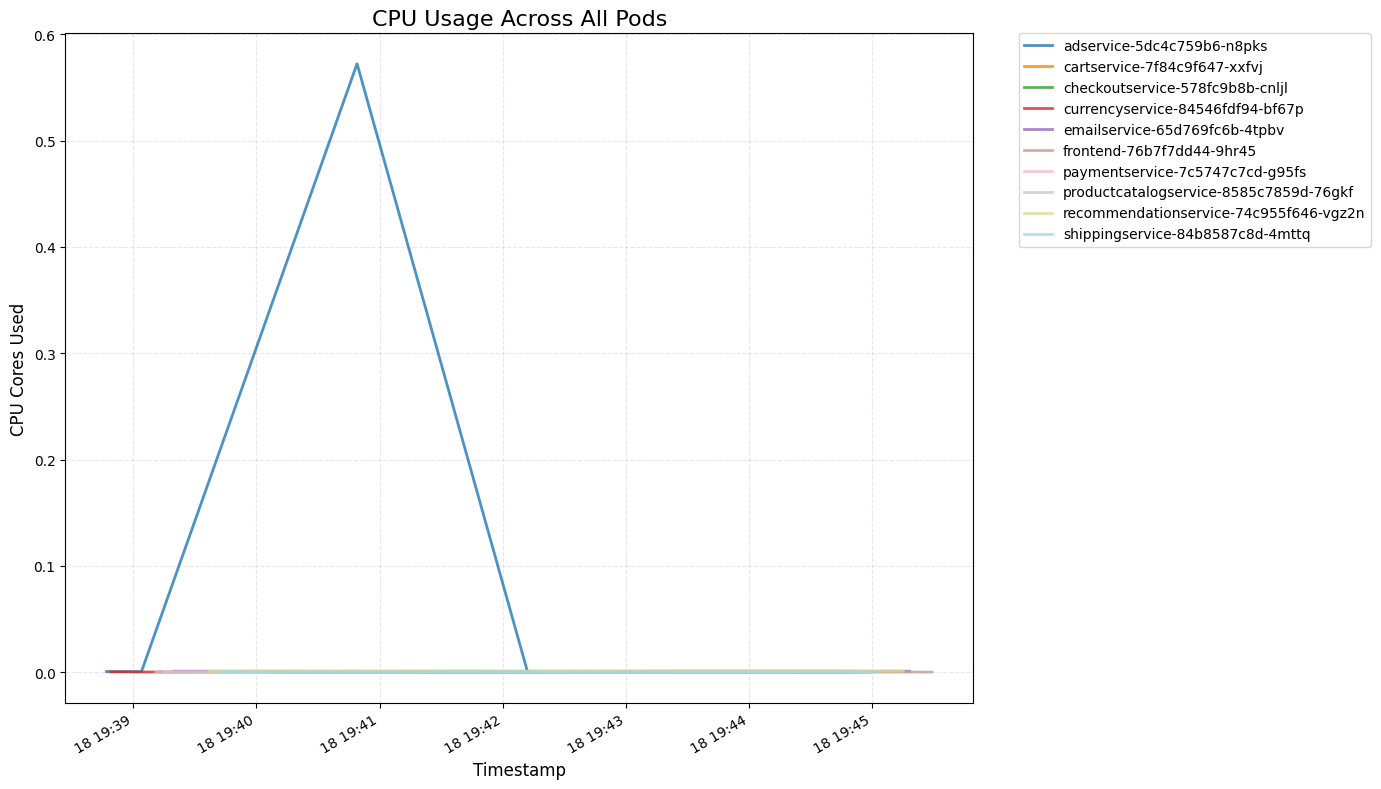

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Ensure timestamp is a column
if 'timestamp' not in mergedData0.columns:
    mergedData0 = mergedData0.reset_index()

# 2. Extract microservice name (optional)
mergedData0['microservice'] = mergedData0['pod'].str.extract(r'^([a-zA-Z0-9-]+?)(?:-\d+)?$')[0]

# 3. Compute CPU usage rate per pod
def calculate_pod_usage(group):
    group = group.sort_values('timestamp').copy()
    group['cpu_cores'] = group['container_cpu_usage_seconds_total'].diff() / group['timestamp'].diff().dt.total_seconds()
    return group.dropna()

pod_usage = mergedData0.groupby('pod', group_keys=False).apply(calculate_pod_usage)

# 4. Create a single figure for all pods
plt.figure(figsize=(14, 8))

# Generate a color palette (one distinct color per pod)
colors = plt.cm.tab20(np.linspace(0, 1, len(pod_usage['pod'].unique())))

# Plot all pods on the same graph
for i, pod in enumerate(pod_usage['pod'].unique()):
    pod_data = pod_usage[pod_usage['pod'] == pod].dropna()
    plt.plot(pod_data['timestamp'],
             pod_data['cpu_cores'],
             color=colors[i],
             linewidth=2,
             alpha=0.8,
             label=pod)

# Formatting the combined plot
plt.title('CPU Usage Across All Pods', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('CPU Cores Used', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Rotate x-axis labels and adjust layout
plt.gcf().autofmt_xdate()
plt.tight_layout()

# Save and show
plt.savefig('all_pods_cpu_usage.png', dpi=300, bbox_inches='tight')
plt.show()

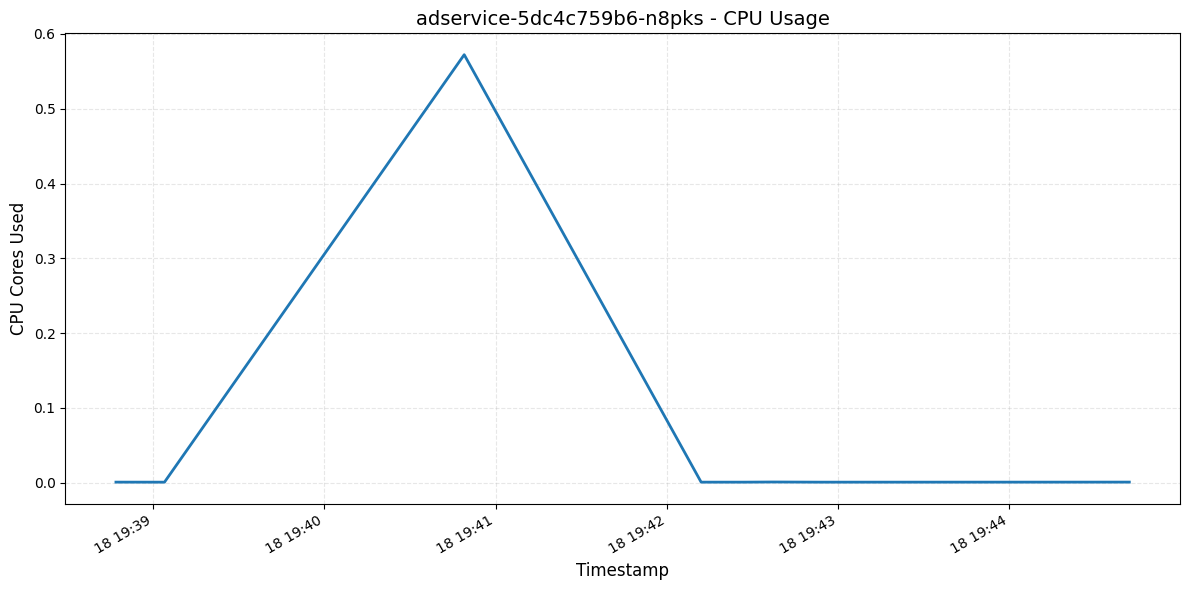

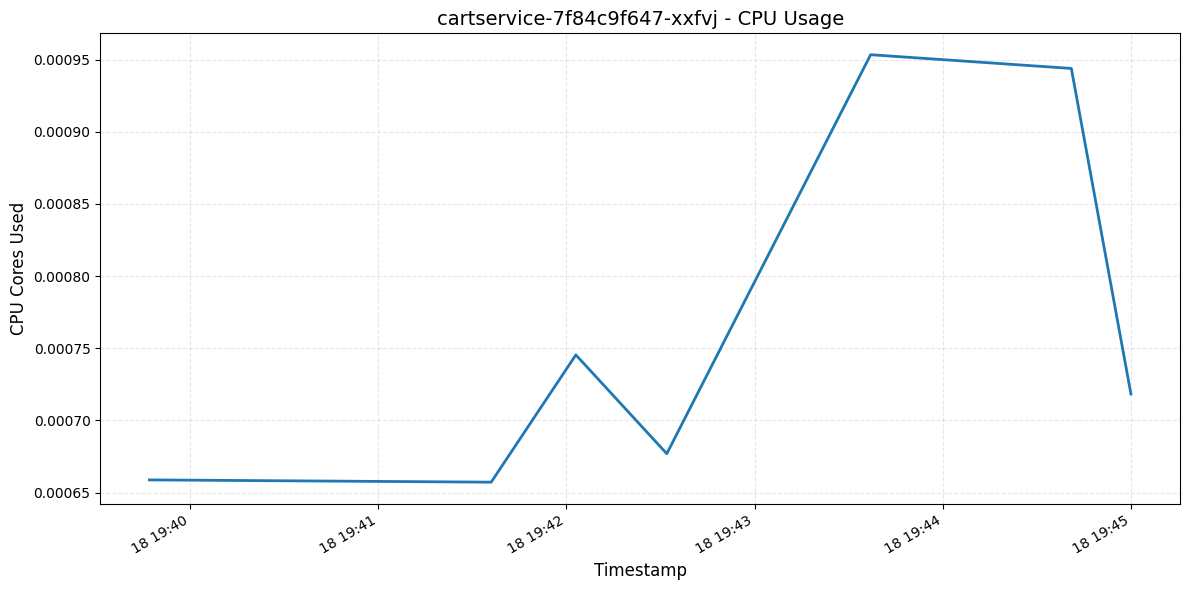

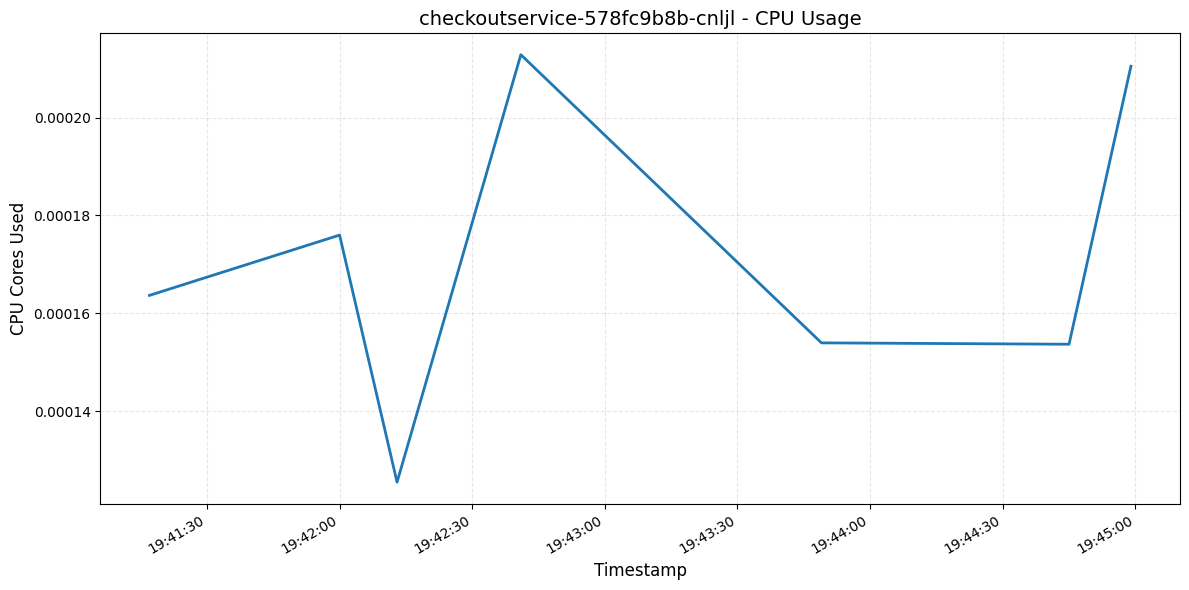

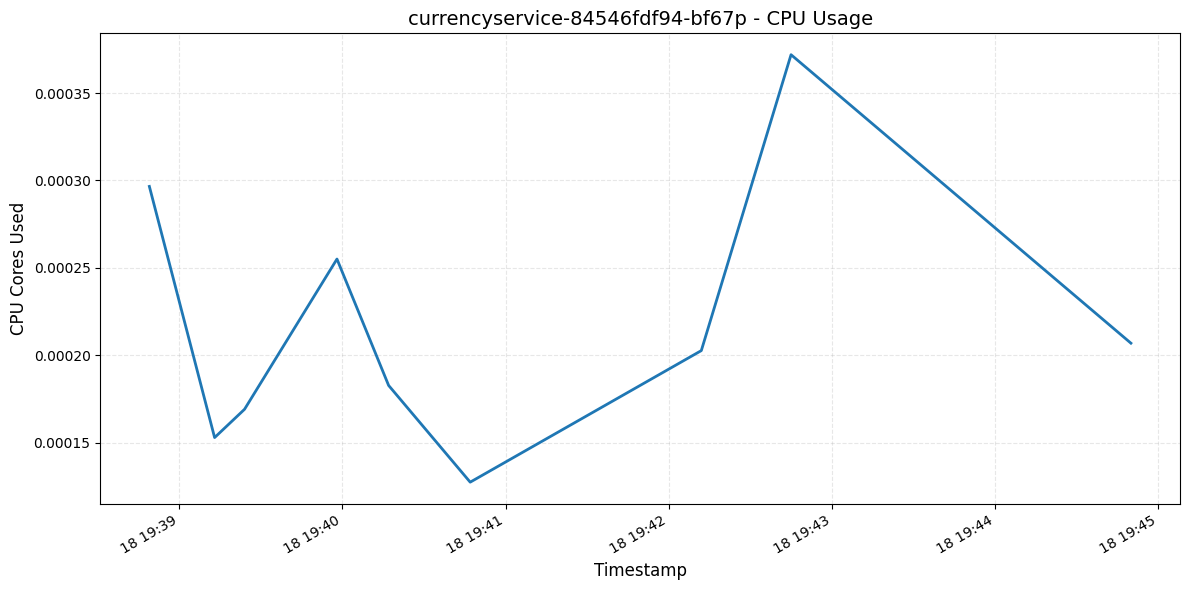

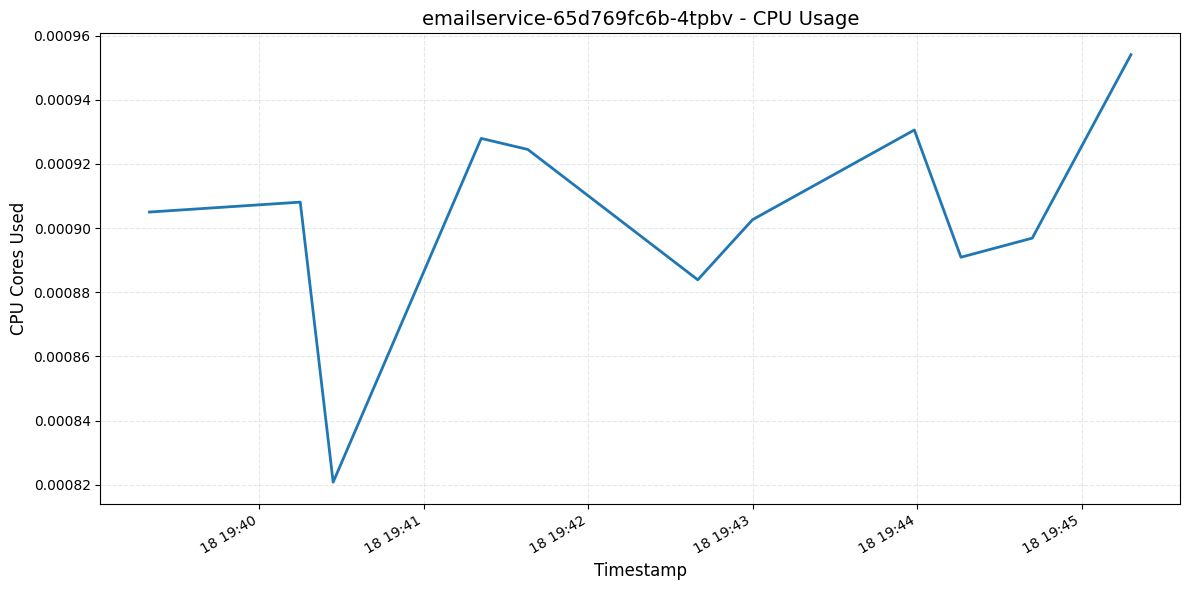

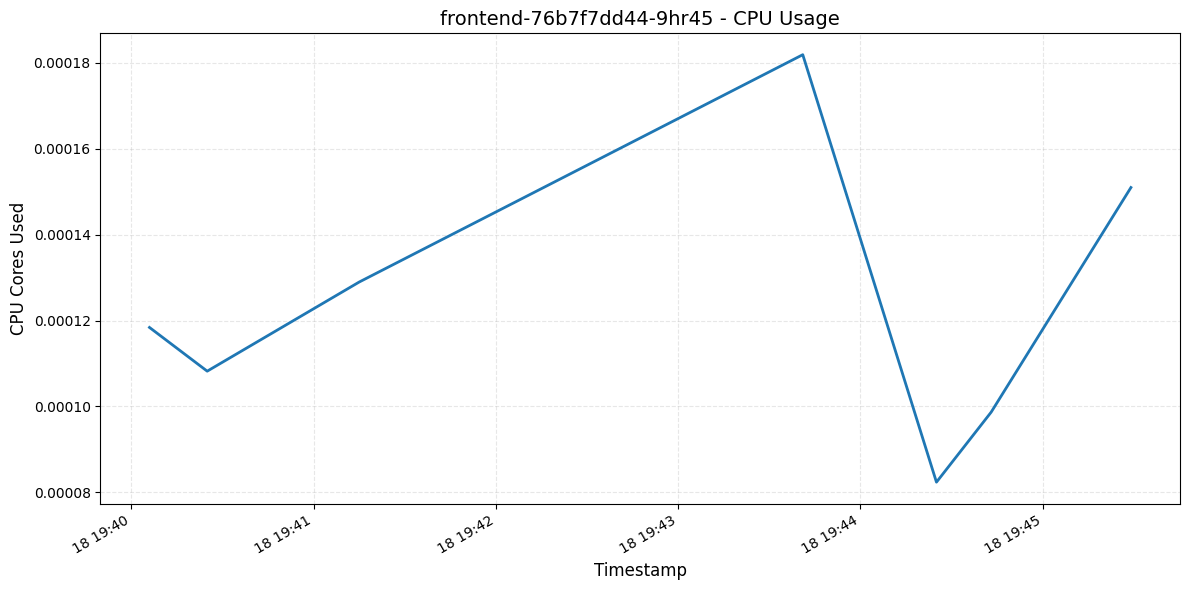

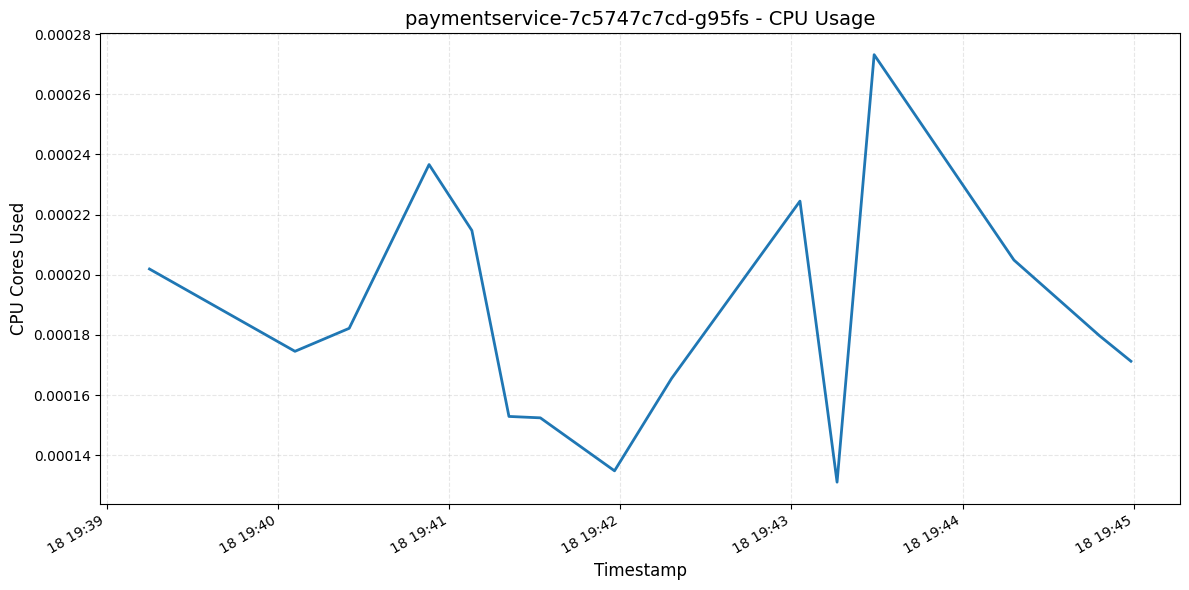

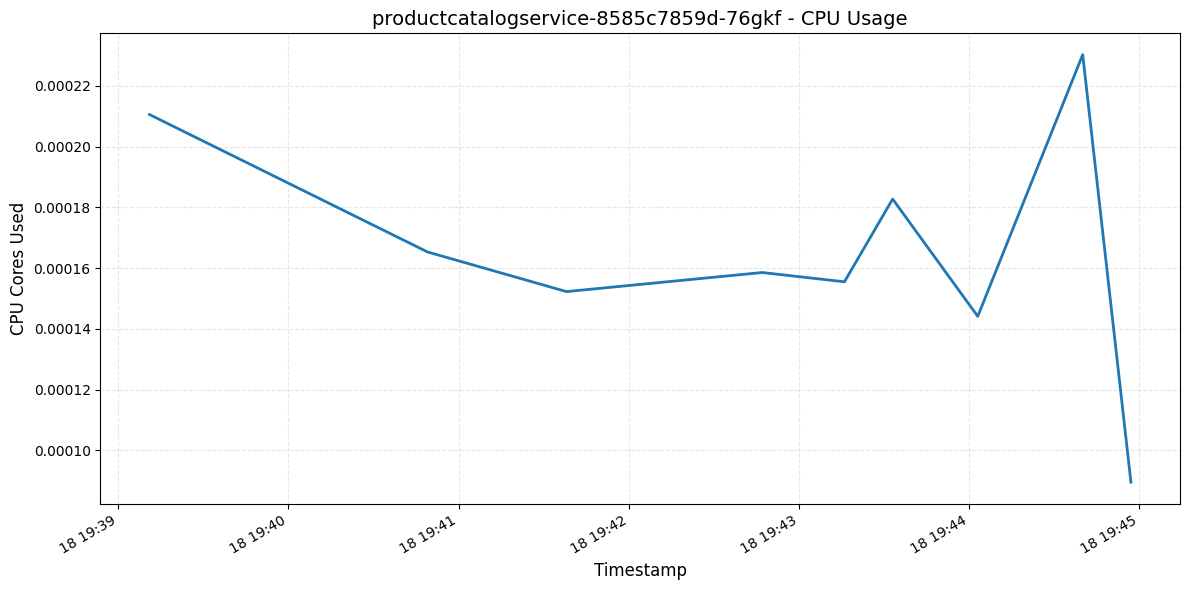

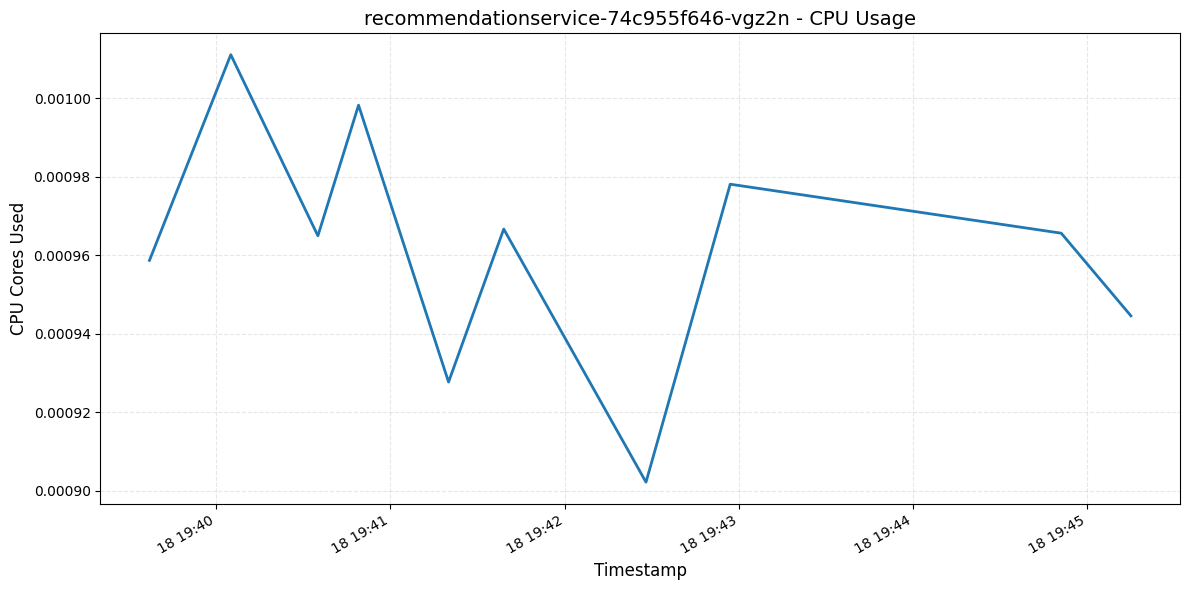

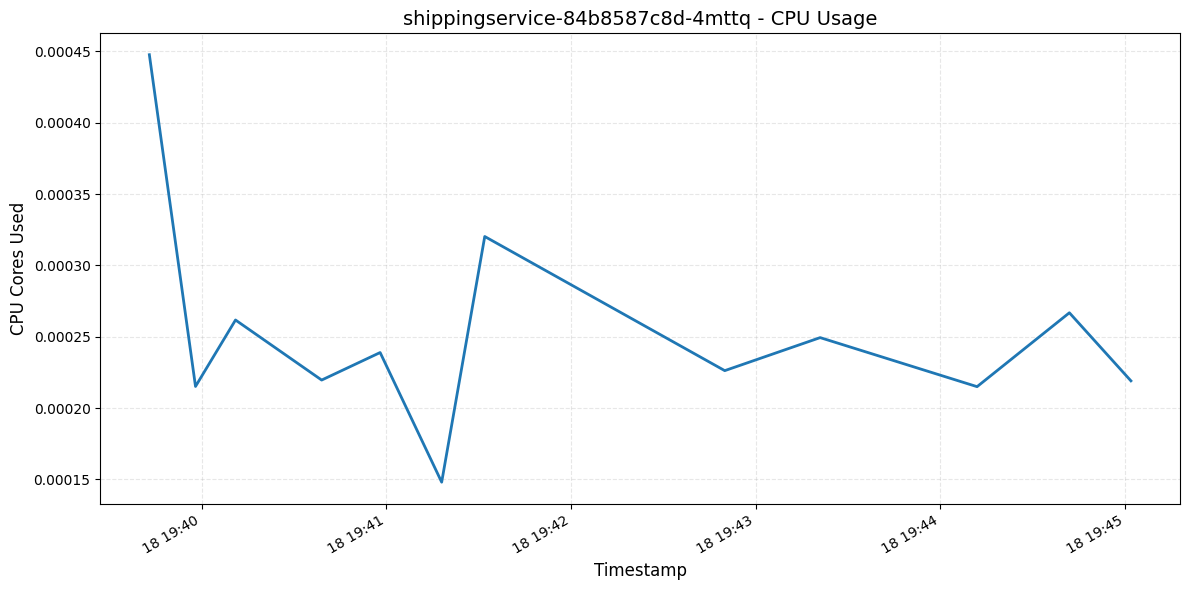

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure timestamp is a column
if 'timestamp' not in mergedData0.columns:
    mergedData0 = mergedData0.reset_index()

# 2. Extract microservice name (optional, for better organization)
mergedData0['microservice'] = mergedData0['pod'].str.extract(r'^([a-zA-Z0-9-]+?)(?:-\d+)?$')[0]

# 3. Compute CPU usage rate per pod
def calculate_pod_usage(group):
    group = group.sort_values('timestamp').copy()

    # Compute CPU cores usage rate
    group['cpu_cores'] = group['container_cpu_usage_seconds_total'].diff() / group['timestamp'].diff().dt.total_seconds()

    # Drop first row of each group (NaN due to diff)
    return group.dropna()

pod_usage = mergedData0.groupby('pod', group_keys=False).apply(calculate_pod_usage)

# 4. Generate individual plots per pod
for pod in pod_usage['pod'].unique():
    plt.figure(figsize=(12, 6))

    pod_data = pod_usage[pod_usage['pod'] == pod].dropna()

    plt.plot(pod_data['timestamp'],
             pod_data['cpu_cores'],
             color='#1f77b4',  # Consistent blue color
             linewidth=2)

    plt.title(f'{pod} - CPU Usage', fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('CPU Cores Used', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Format x-axis
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # Save and show
    plt.savefig(f'{pod}_cpu_usage.png', dpi=300, bbox_inches='tight')
    plt.show()


In [44]:
# The (1024 * 1024) conversion is used to convert bytes into megabytes (MB) because:

# 1 KB (kilobyte) = 1024 bytes

# 1 MB (megabyte) = 1024 KB

# So, 1 MB = 1024 × 1024 bytes = 1,048,576 bytes

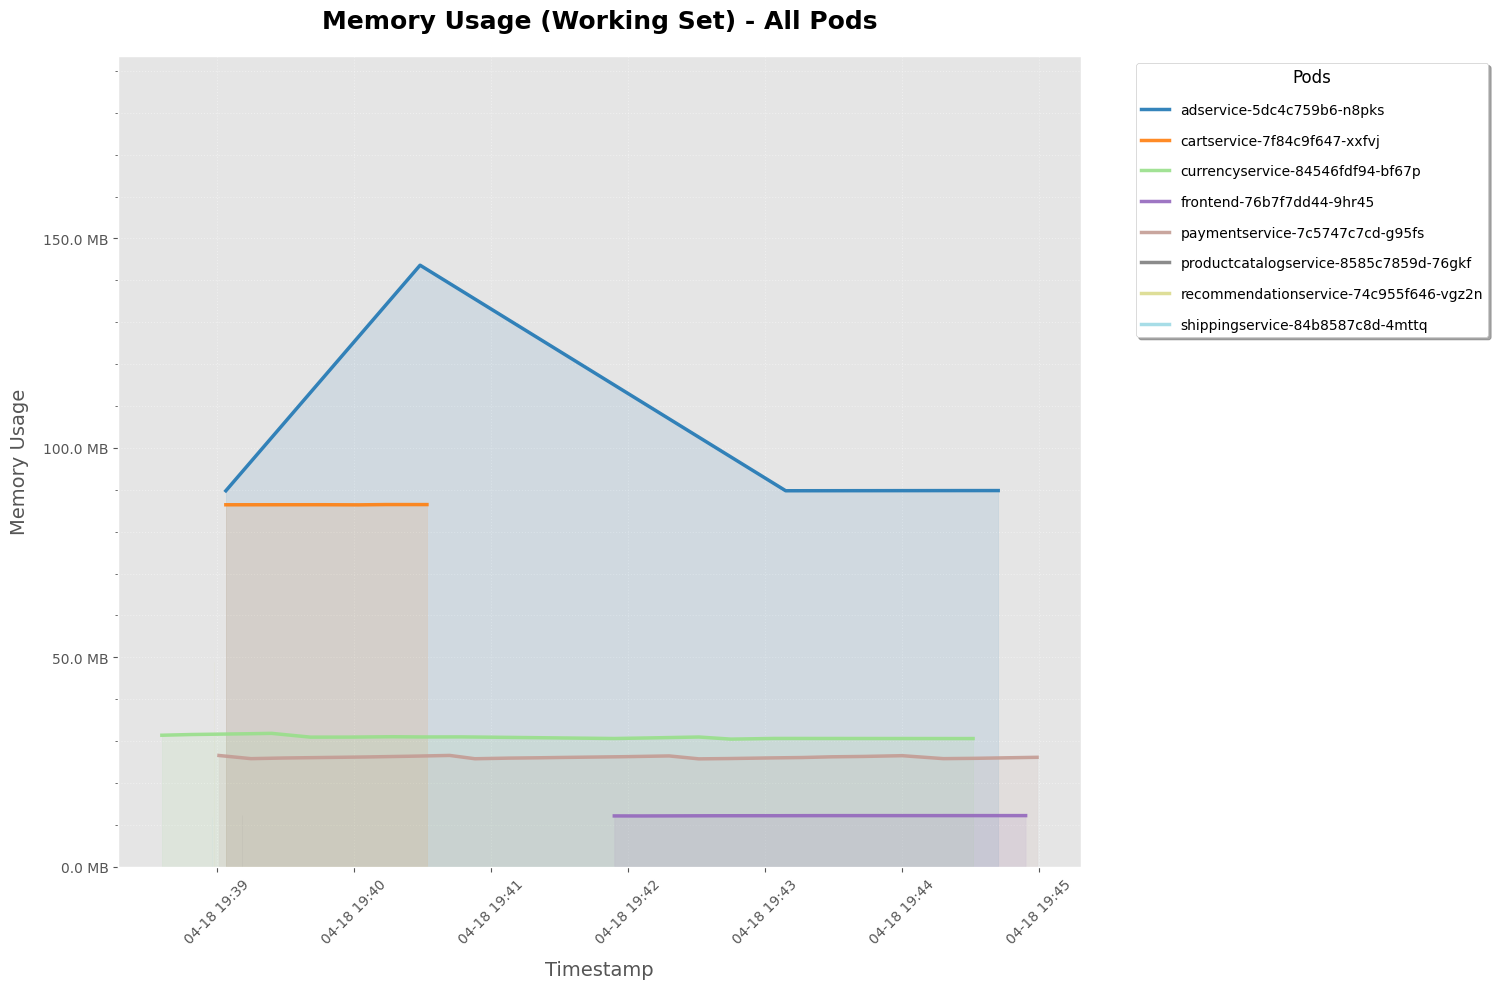

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# 1. Data preparation
if 'timestamp' not in mergedData2.columns:
    mergedData2 = mergedData2.reset_index()
mergedData2['timestamp'] = pd.to_datetime(mergedData2['timestamp'])
mergedData2 = mergedData2.dropna(subset=['container_memory_working_set_bytes'])
mergedData2['microservice'] = mergedData2['pod'].str.extract(r'([a-zA-Z]+)-')[0]
mergedData2['memory_mb'] = mergedData2['container_memory_working_set_bytes'] / (1024 * 1024)
mergedData2 = mergedData2.sort_values(by='timestamp')
grouped_data2 = mergedData2.groupby(['pod', 'timestamp']).last().reset_index()

# 2. Create figure with adjusted y-axis
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 10))

# Calculate y-axis limits based on data spread
max_mem = grouped_data2['memory_mb'].max()
min_mem = grouped_data2['memory_mb'].min()

# If all values are under 512MB, adjust y-axis to show details
if max_mem < 512:
    buffer = max(50, (max_mem - min_mem) * 0.3)  # Add 30% buffer or 50MB, whichever is larger
    y_min = max(0, min_mem - buffer)
    y_max = max_mem + buffer
    ax.set_ylim(y_min, y_max)
else:
    ax.set_ylim(0, max(512, max_mem * 1.1))  # Default behavior with 10% buffer

plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['grid.color'] = 'white'

# 3. Color and style setup
unique_pods = grouped_data2['pod'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_pods)))

# 4. Enhanced plotting with better spacing
for i, pod in enumerate(unique_pods):
    pod_data = grouped_data2[grouped_data2['pod'] == pod]
    line = ax.plot(pod_data['timestamp'],
                  pod_data['memory_mb'],
                  color=colors[i],
                  linewidth=2.5,
                  alpha=0.9,
                  label=pod)

    # Add subtle fill under each line
    ax.fill_between(pod_data['timestamp'],
                   pod_data['memory_mb'],
                   alpha=0.1,
                   color=colors[i])

# 5. Formatting improvements
def mem_formatter(x, pos):
    if x >= 1024:
        return f'{x/1024:.1f} GB'
    return f'{x:.1f} MB'  # Using 1 decimal for better precision at low values

ax.yaxis.set_major_formatter(FuncFormatter(mem_formatter))
ax.set_title('Memory Usage (Working Set) - All Pods', fontsize=18, pad=20, weight='bold')
ax.set_xlabel('Timestamp', fontsize=14, labelpad=10)
ax.set_ylabel('Memory Usage', fontsize=14, labelpad=10)

# 6. Custom grid and threshold lines (adjusted for low values)
if max_mem < 512:
    # Add more granular grid lines for low memory range
    ax.yaxis.set_major_locator(plt.MultipleLocator(50))  # Every 50MB
    ax.yaxis.set_minor_locator(plt.MultipleLocator(10))  # Minor ticks every 10MB
    ax.grid(which='both', linestyle=':', alpha=0.4)
else:
    ax.grid(True, linestyle='-', alpha=0.4)

# 7. Date formatting
date_form = DateFormatter("%m-%d %H:%M")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.autofmt_xdate(rotation=45, ha='center')

# 8. Enhanced legend with vertical spacing
legend = ax.legend(bbox_to_anchor=(1.05, 1),
                  loc='upper left',
                  borderaxespad=0.5,
                  frameon=True,
                  shadow=True,
                  title='Pods',
                  title_fontsize=12,
                  labelspacing=1.2)  # Increased spacing between legend items

legend.get_frame().set_facecolor('#FFFFFF')

# 9. Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save with high quality
plt.savefig('all_pods_memory_usage_working_set.png',
            dpi=350,
            bbox_inches='tight')
plt.show()

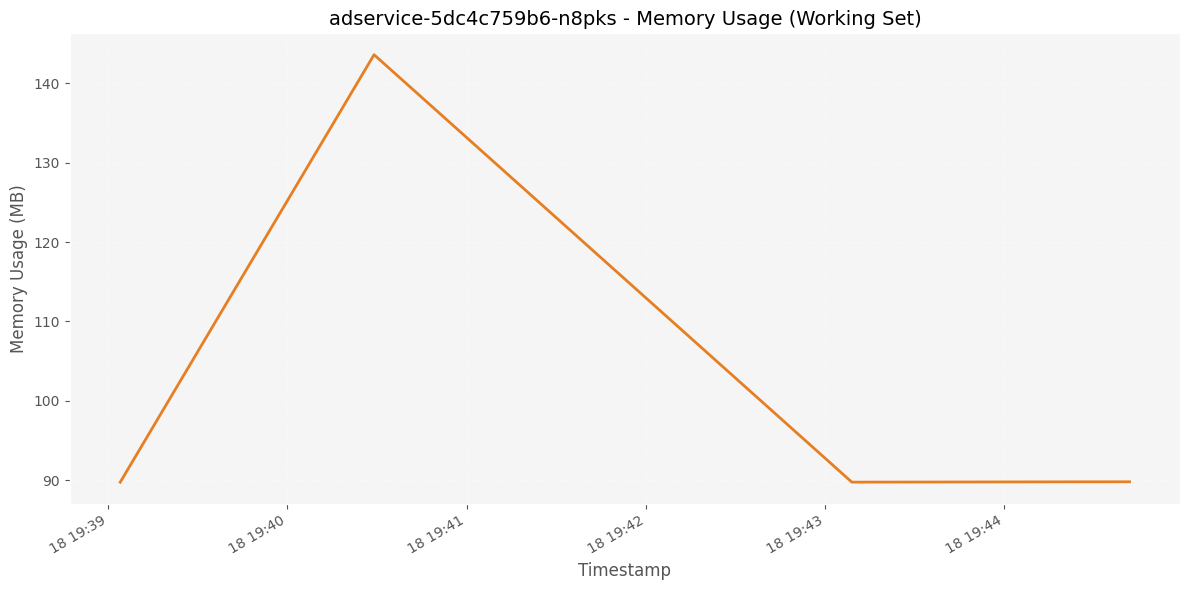

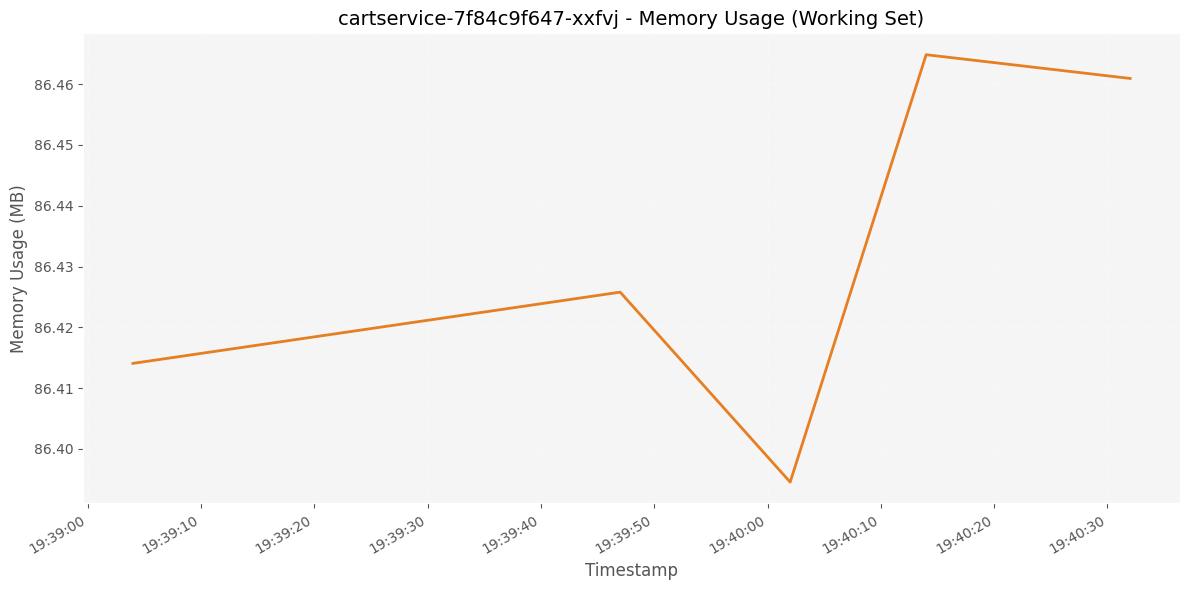

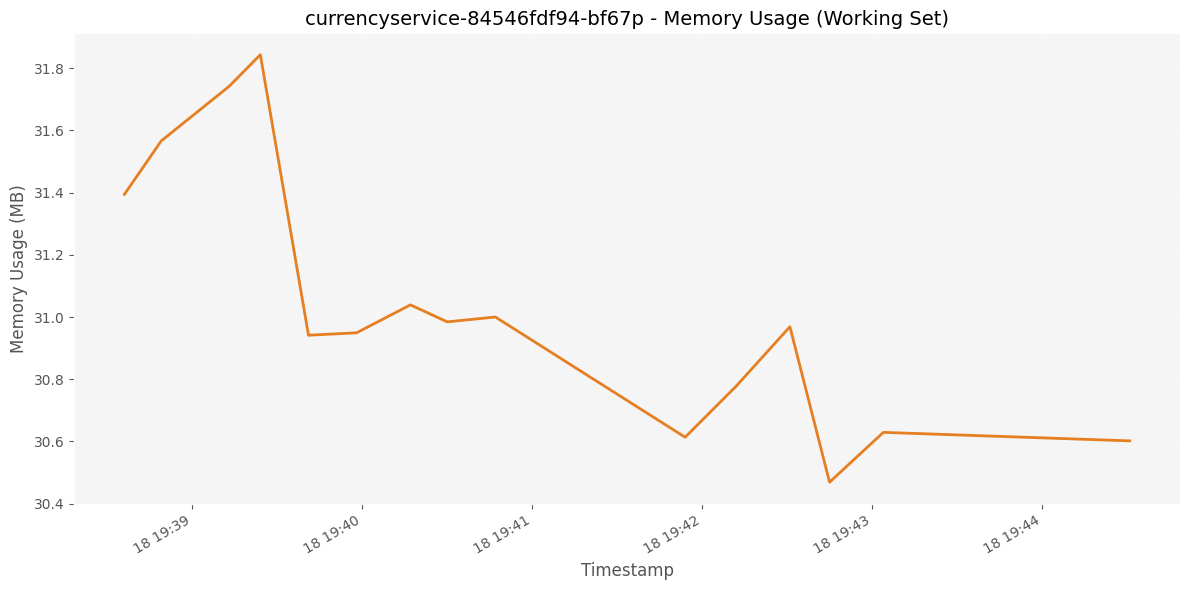

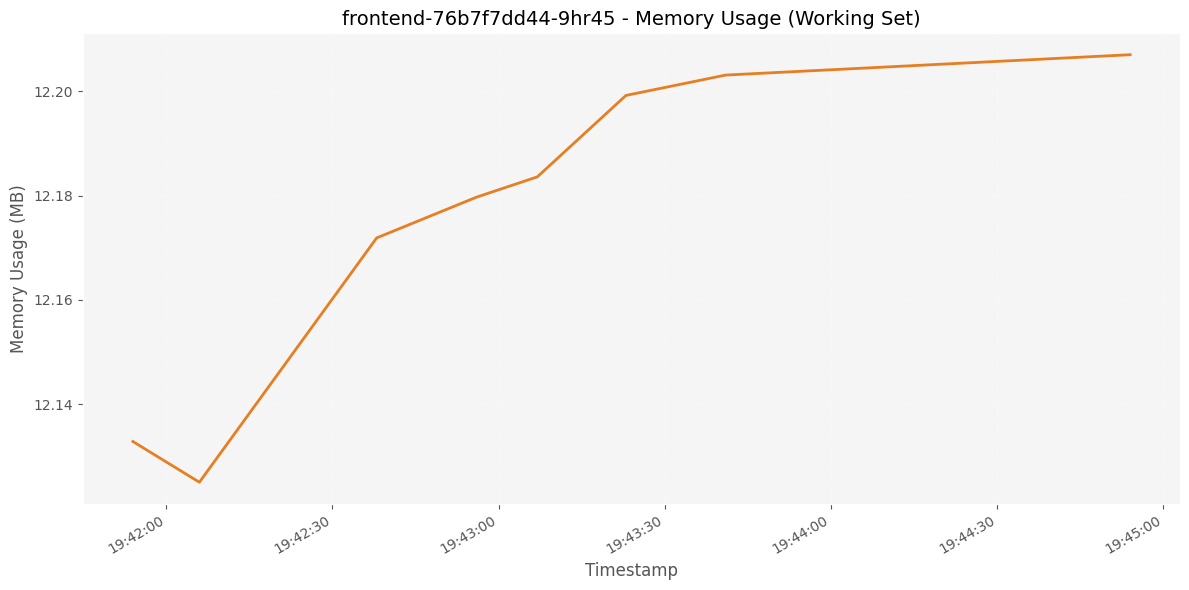

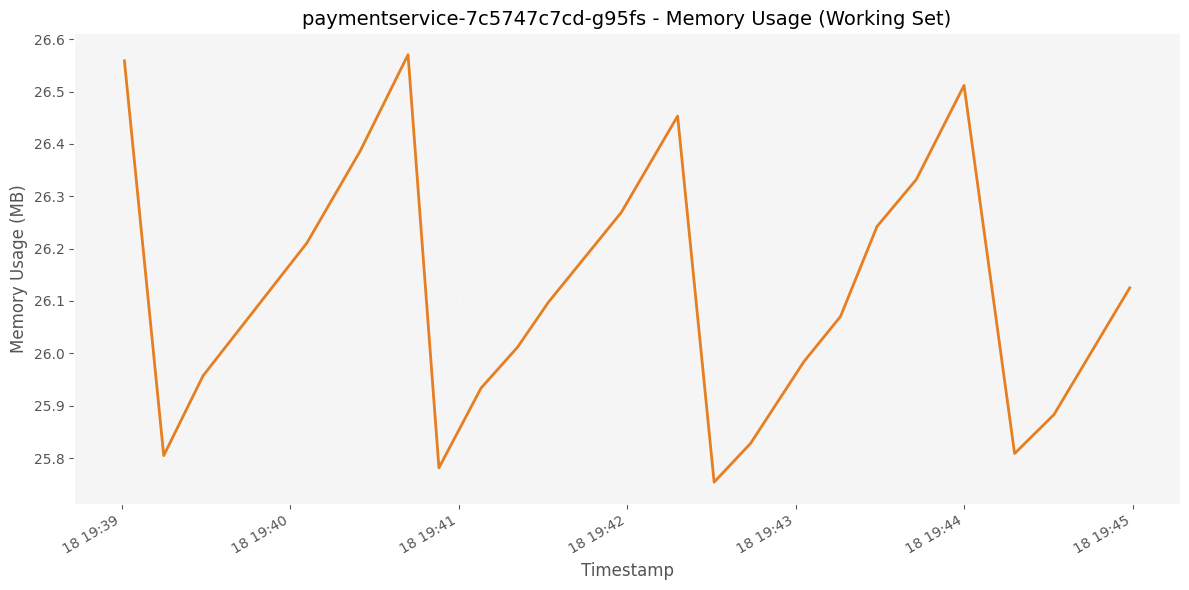

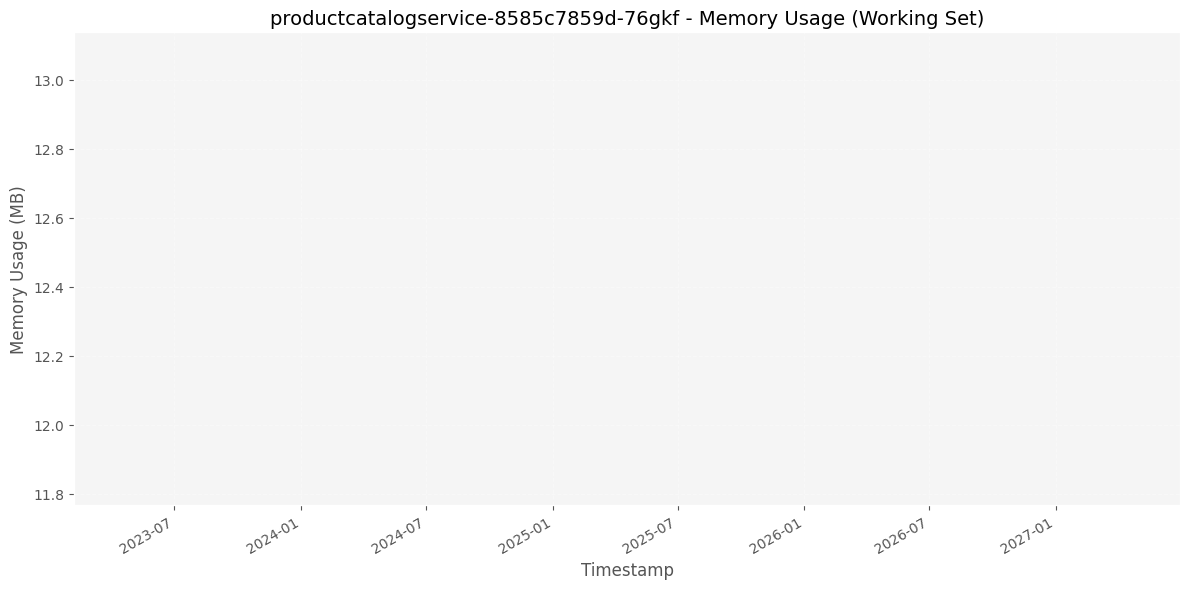

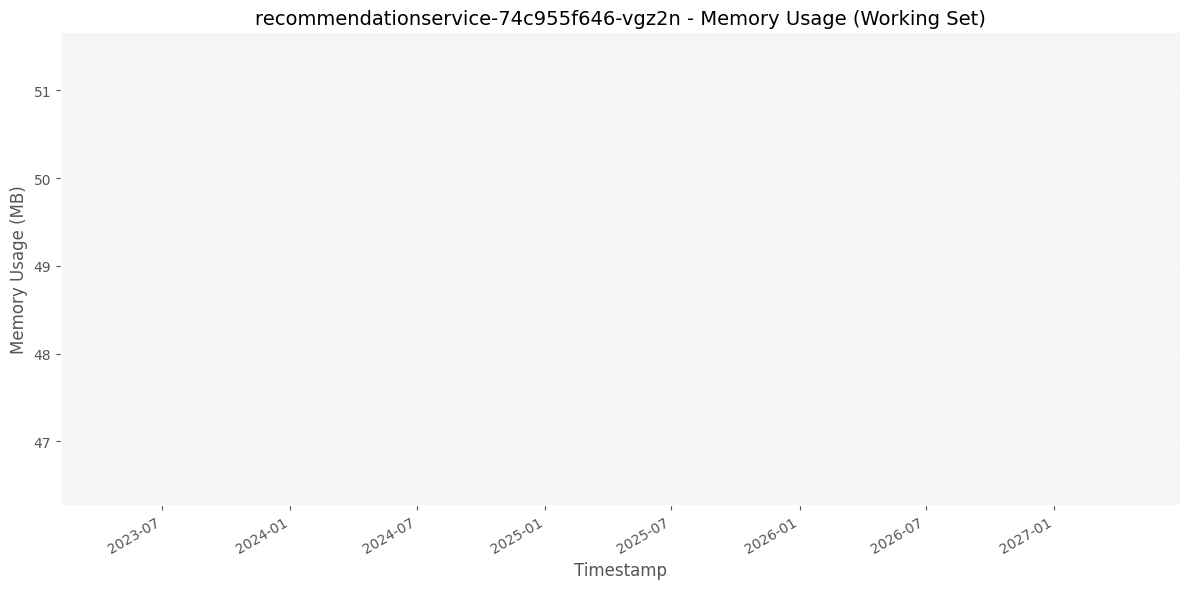

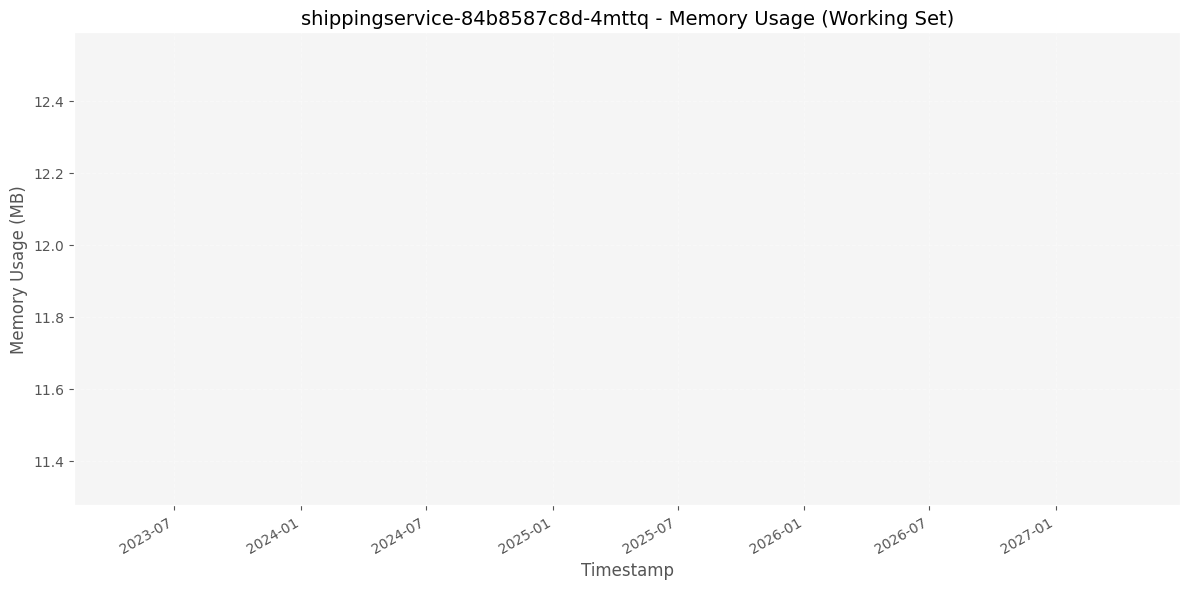

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure timestamp is in datetime format
if 'timestamp' not in mergedData2.columns:
    mergedData2 = mergedData2.reset_index()
mergedData2['timestamp'] = pd.to_datetime(mergedData2['timestamp'])

# 2. Remove NaN values before processing
mergedData2 = mergedData2.dropna(subset=['container_memory_working_set_bytes'])

# 3. Extract microservice name from pod name
mergedData2['microservice'] = mergedData2['pod'].str.extract(r'([a-zA-Z]+)-')[0]

# 4. Convert bytes to MB for better readability
mergedData2['memory_mb'] = mergedData2['container_memory_working_set_bytes'] / (1024 * 1024)

# 5. Sort timestamps before grouping
mergedData2 = mergedData2.sort_values(by='timestamp')

# 6. Group by pod and timestamp, keeping the latest value per timestamp
grouped_data2 = mergedData2.groupby(['pod', 'timestamp']).last().reset_index()

# 7. Plot memory usage for each pod separately
for pod in grouped_data2['pod'].unique():
    plt.figure(figsize=(12, 6))

    pod_data = grouped_data2[grouped_data2['pod'] == pod]

    plt.plot(pod_data['timestamp'],
             pod_data['memory_mb'],
             color='#e67e22',  # Orange color
             linewidth=2)

    plt.title(f'{pod} - Memory Usage (Working Set)', fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('Memory Usage (MB)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Format x-axis
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # Save and show
    plt.savefig(f'{pod}_memory_usage_working_set.png', dpi=300, bbox_inches='tight')
    plt.show()


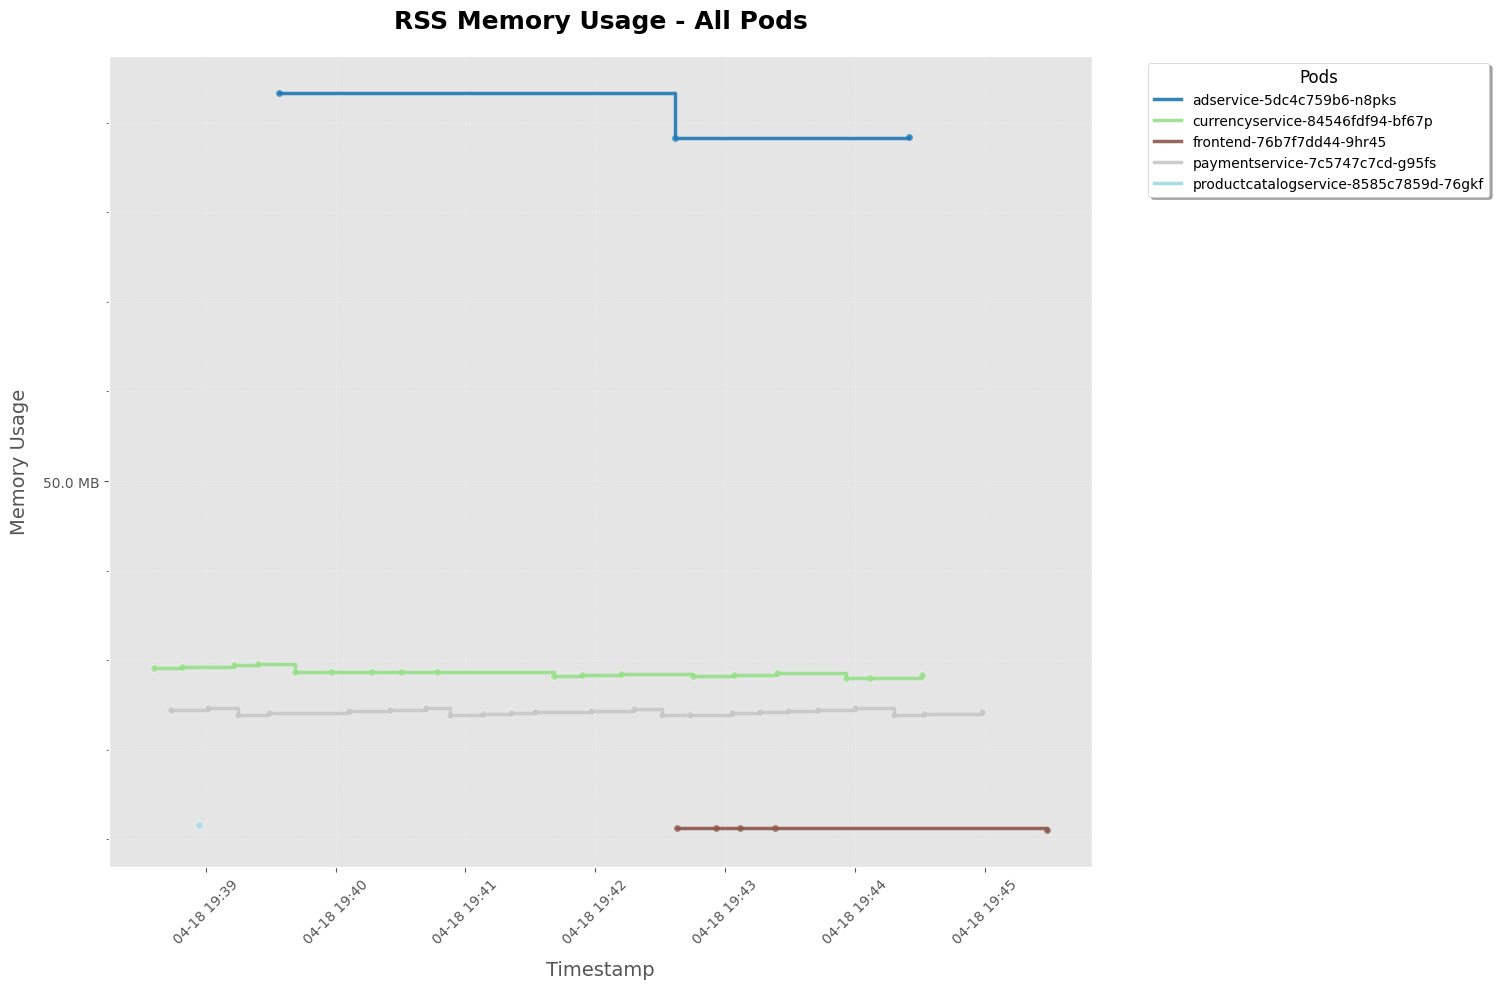

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# 1. Data preparation
if 'timestamp' not in mergedData3.columns:
    mergedData3 = mergedData3.reset_index()
mergedData3['timestamp'] = pd.to_datetime(mergedData3['timestamp'])
mergedData3 = mergedData3.dropna(subset=['container_memory_rss'])
mergedData3['microservice'] = mergedData3['pod'].str.extract(r'([a-zA-Z]+)-')[0]
mergedData3['memory_mb'] = mergedData3['container_memory_rss'] / (1024 * 1024)
mergedData3 = mergedData3.sort_values(by='timestamp')
grouped_data3 = mergedData3.groupby(['pod', 'timestamp']).last().reset_index()

# 2. Create single figure with improved layout
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 10))
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['grid.color'] = 'white'

# 3. Color and style setup
unique_pods = grouped_data3['pod'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_pods)))

# 4. Plot all pods using step plots
for i, pod in enumerate(unique_pods):
    pod_data = grouped_data3[grouped_data3['pod'] == pod]

    # STEP plot shows discrete memory changes accurately
    ax.step(pod_data['timestamp'],
            pod_data['memory_mb'],
            where='post',  # Steps occur after the value change
            color=colors[i],
            linewidth=2.5,
            alpha=0.9,
            label=pod)

    # Mark actual measurement points
    ax.scatter(pod_data['timestamp'],
               pod_data['memory_mb'],
               color=colors[i],
               s=30,
               alpha=0.7,
               edgecolor='white',
               linewidth=0.5)

# 5. Formatting improvements
def mem_formatter(x, pos):
    if x >= 1024:
        return f'{x/1024:.1f} GB'
    return f'{x:.1f} MB'

ax.yaxis.set_major_formatter(FuncFormatter(mem_formatter))
ax.set_title('RSS Memory Usage - All Pods', fontsize=18, pad=20, weight='bold')
ax.set_xlabel('Timestamp', fontsize=14, labelpad=10)
ax.set_ylabel('Memory Usage', fontsize=14, labelpad=10)

# 6. Dynamic grid and scaling
max_mem = grouped_data3['memory_mb'].max()
if max_mem < 512:
    ax.yaxis.set_major_locator(plt.MultipleLocator(50))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.grid(True, which='both', linestyle=':', alpha=0.4)

# 7. Date formatting
date_form = DateFormatter("%m-%d %H:%M")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.autofmt_xdate(rotation=45, ha='center')

# 8. Enhanced legend
legend = ax.legend(bbox_to_anchor=(1.05, 1),
                  loc='upper left',
                  borderaxespad=0.5,
                  frameon=True,
                  shadow=True,
                  title='Pods',
                  title_fontsize=12,
                  ncol=1 + len(unique_pods)//15)  # Auto-adjust columns
legend.get_frame().set_facecolor('#FFFFFF')

# 9. Final layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig('all_pods_rss_memory_usage.png', dpi=350, bbox_inches='tight')
plt.show()

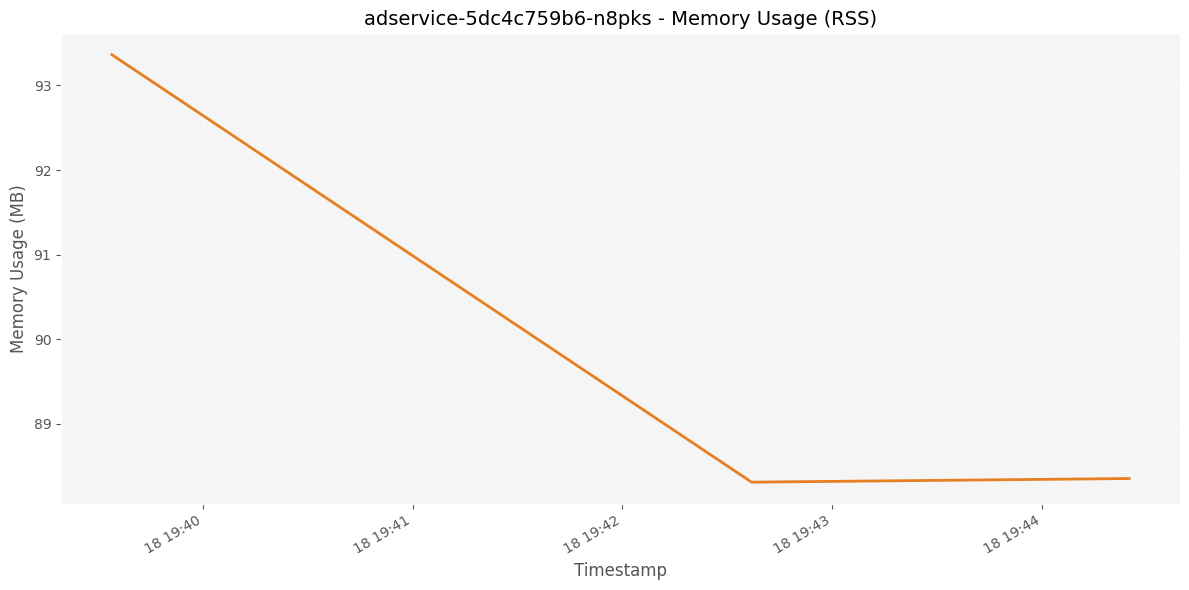

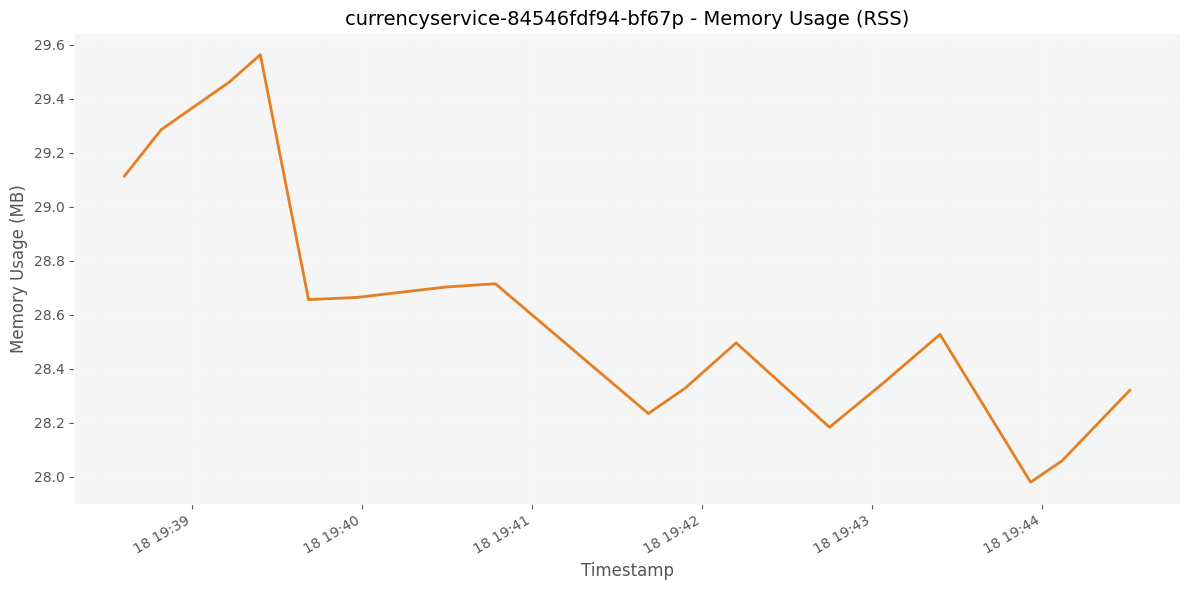

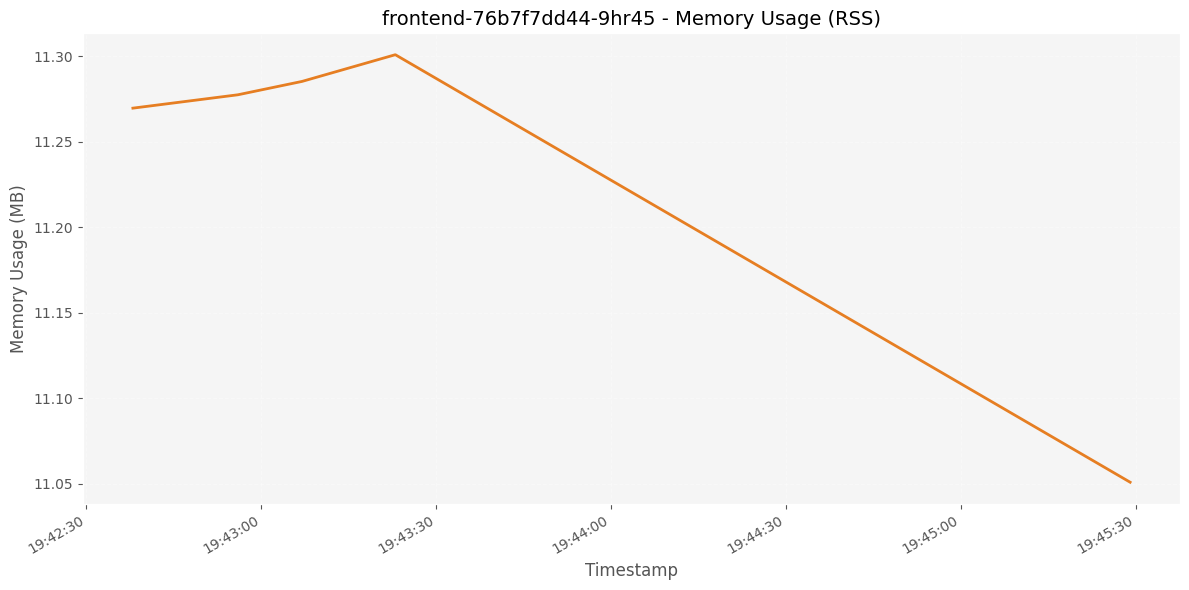

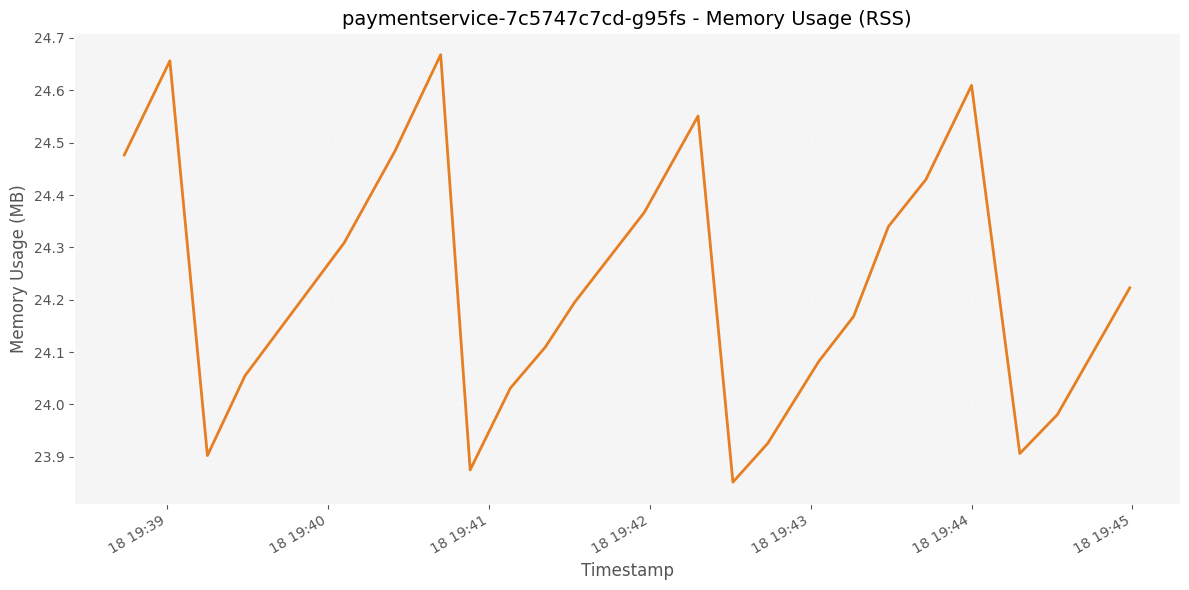

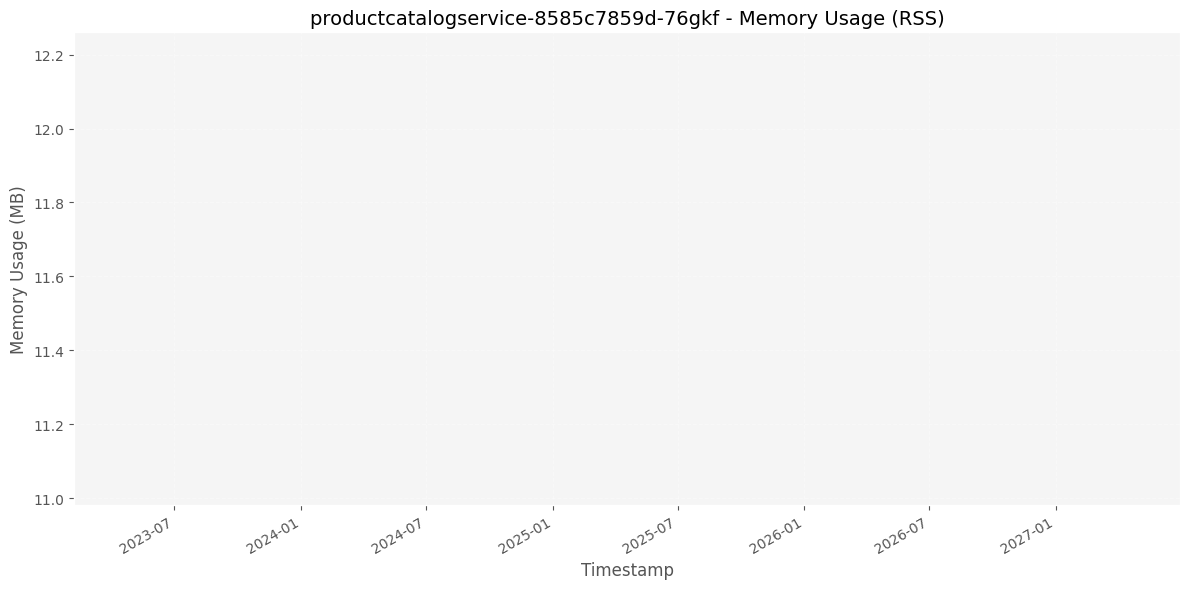

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure timestamp is in datetime format
if 'timestamp' not in mergedData3.columns:
    mergedData3 = mergedData3.reset_index()
mergedData3['timestamp'] = pd.to_datetime(mergedData3['timestamp'])

# 2. Remove NaN values before processing
mergedData3 = mergedData3.dropna(subset=['container_memory_rss'])

# 3. Extract microservice name from pod name
mergedData3['microservice'] = mergedData3['pod'].str.extract(r'([a-zA-Z]+)-')[0]

# 4. Convert bytes to MB for better readability
mergedData3['memory_mb'] = mergedData3['container_memory_rss'] / (1024 * 1024)

# 5. Sort timestamps before grouping
mergedData3 = mergedData3.sort_values(by='timestamp')

# 6. Group by pod and timestamp, keeping the latest value per timestamp
grouped_data3 = mergedData3.groupby(['pod', 'timestamp']).last().reset_index()

# 7. Plot memory usage for each pod separately
for pod in grouped_data3['pod'].unique():
    plt.figure(figsize=(12, 6))

    pod_data = grouped_data3[grouped_data3['pod'] == pod]

    plt.plot(pod_data['timestamp'],
             pod_data['memory_mb'],
             color='#e67e22',  # Orange color
             linewidth=2)

    plt.title(f'{pod} - Memory Usage (RSS)', fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('Memory Usage (MB)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Format x-axis
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # Save and show
    plt.savefig(f'{pod}_memory_usage_rss.png', dpi=300, bbox_inches='tight')
    plt.show()


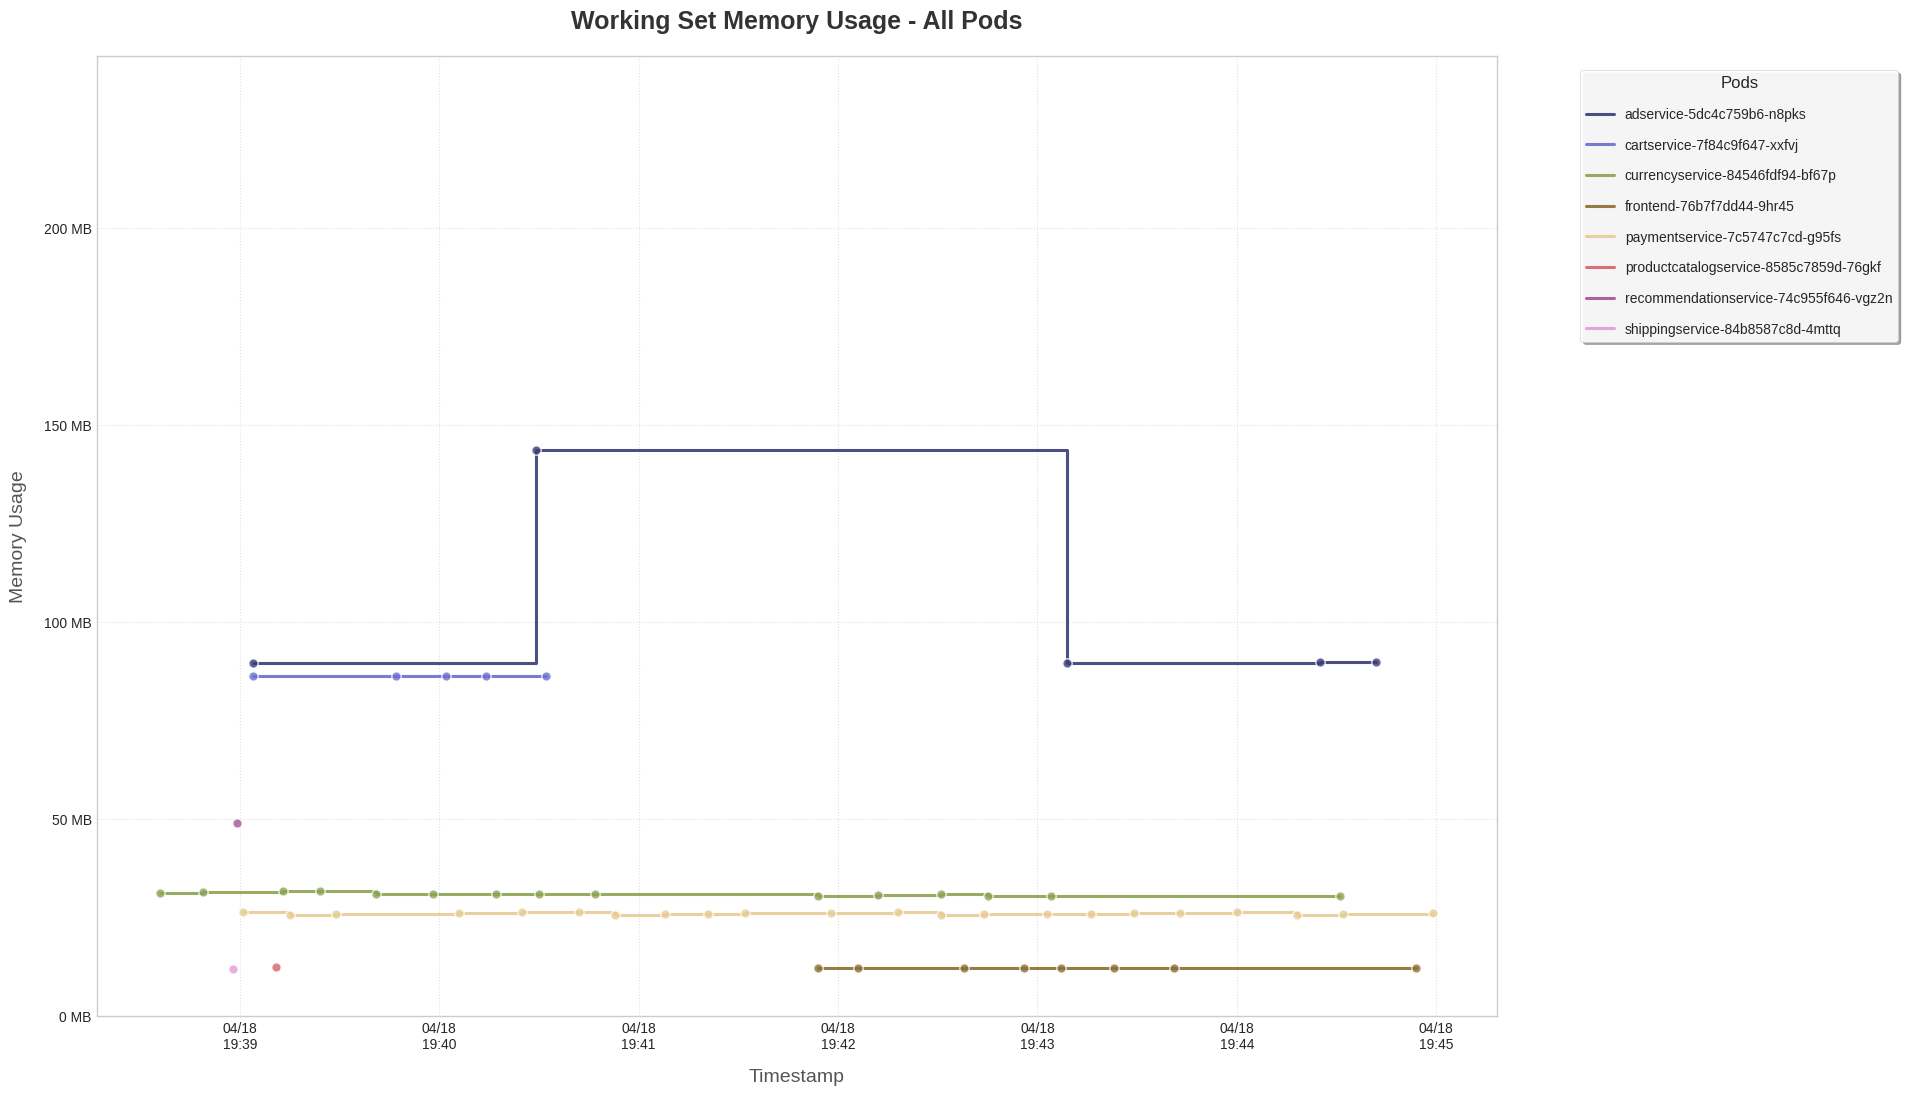

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# 1. Data preparation
if 'timestamp' not in mergedData2.columns:
    mergedData2 = mergedData2.reset_index()
mergedData2['timestamp'] = pd.to_datetime(mergedData2['timestamp'])
mergedData2 = mergedData2.dropna(subset=['container_memory_working_set_bytes'])
mergedData2['microservice'] = mergedData2['pod'].str.extract(r'([a-zA-Z]+)-')[0]
mergedData2['memory_mb'] = mergedData2['container_memory_working_set_bytes'] / (1024 * 1024)
mergedData2 = mergedData2.sort_values(by='timestamp')
grouped_data2 = mergedData2.groupby(['pod', 'timestamp']).last().reset_index()

# 2. Create figure with professional styling
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(20, 12))
plt.rcParams['axes.facecolor'] = '#FAFAFA'
plt.rcParams['grid.color'] = '#DDDDDD'

# 3. Create color palette and style
unique_pods = grouped_data2['pod'].unique()
colors = plt.cm.tab20b(np.linspace(0, 1, len(unique_pods)))  # More distinct colors

# 4. Plot all pods with step plots and markers
for i, pod in enumerate(unique_pods):
    pod_data = grouped_data2[grouped_data2['pod'] == pod]

    # Step plot shows discrete memory changes
    ax.step(pod_data['timestamp'],
            pod_data['memory_mb'],
            where='post',
            color=colors[i],
            linewidth=2.2,
            alpha=0.9,
            label=pod)

    # Mark measurement points
    ax.scatter(pod_data['timestamp'],
               pod_data['memory_mb'],
               color=colors[i],
               s=45,
               edgecolor='white',
               linewidth=1,
               alpha=0.8,
               zorder=3)

# 5. Enhanced formatting
def mem_formatter(x, pos):
    if x >= 1024:
        return f'{x/1024:.1f} GB'
    return f'{x:.0f} MB'

ax.yaxis.set_major_formatter(FuncFormatter(mem_formatter))
ax.set_title('Working Set Memory Usage - All Pods',
            fontsize=18, pad=20, weight='bold', color='#333333')
ax.set_xlabel('Timestamp', fontsize=14, labelpad=12, color='#555555')
ax.set_ylabel('Memory Usage', fontsize=14, labelpad=12, color='#555555')

# 6. Dynamic y-axis scaling
max_mem = grouped_data2['memory_mb'].max()
buffer = max(100, max_mem * 0.15)  # 15% buffer or 100MB minimum
ax.set_ylim(0, max_mem + buffer)

# 7. Smart grid and thresholds
ax.grid(True, which='both', linestyle=':', alpha=0.6)
if max_mem > 1024:  # Only show GB thresholds if needed
    for threshold in [1024, 2048, 4096]:
        ax.axhline(y=threshold, color='#FF6B6B', linestyle='--', alpha=0.3)
        ax.text(pod_data['timestamp'].iloc[-1],
                threshold + 75,
                f'{threshold/1024:.0f} GB',
                ha='right', va='center',
                color='#FF6B6B', alpha=0.8)

# 8. Date formatting
ax.xaxis.set_major_formatter(DateFormatter("%m/%d\n%H:%M"))
ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=12))
fig.autofmt_xdate(rotation=0, ha='center')

# 9. Enhanced legend
legend = ax.legend(bbox_to_anchor=(1.05, 1),
                  loc='upper left',
                  borderaxespad=1,
                  frameon=True,
                  shadow=True,
                  title='Pods',
                  title_fontsize=12,
                  fontsize=10,
                  ncol=1 + len(unique_pods)//20,
                  labelspacing=1.2)
legend.get_frame().set_facecolor('#FFFFFF')
legend.get_frame().set_alpha(0.9)

# 10. Final layout
plt.subplots_adjust(left=0.08, right=0.78, top=0.92, bottom=0.12)
plt.savefig('all_pods_working_set_memory.png',
            dpi=400,
            bbox_inches='tight',
            facecolor=fig.get_facecolor())
plt.show()

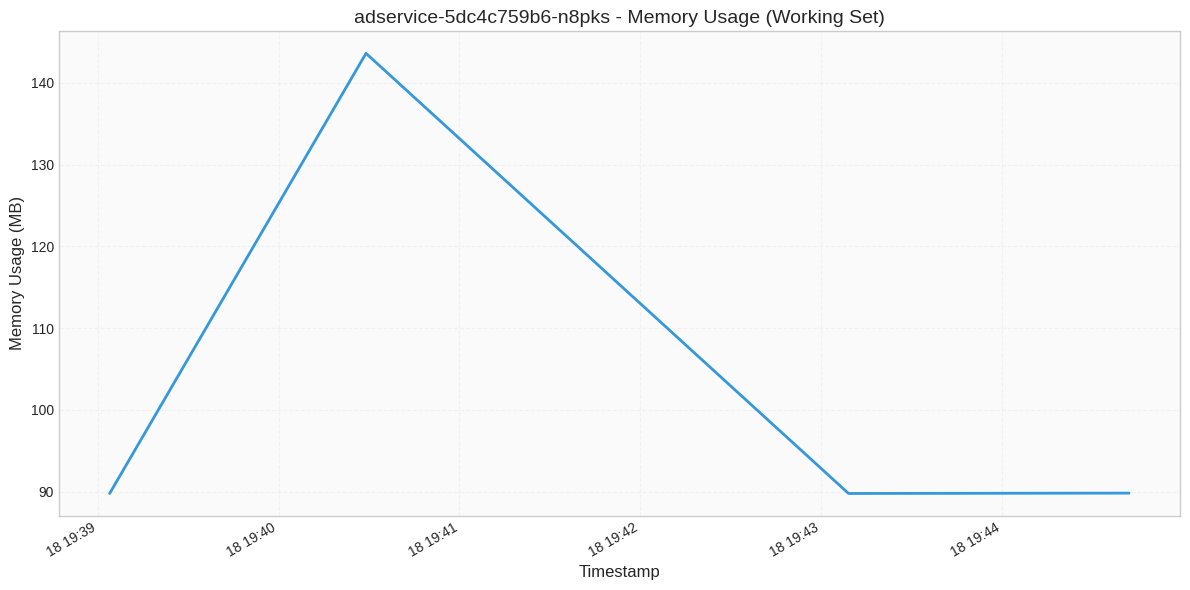

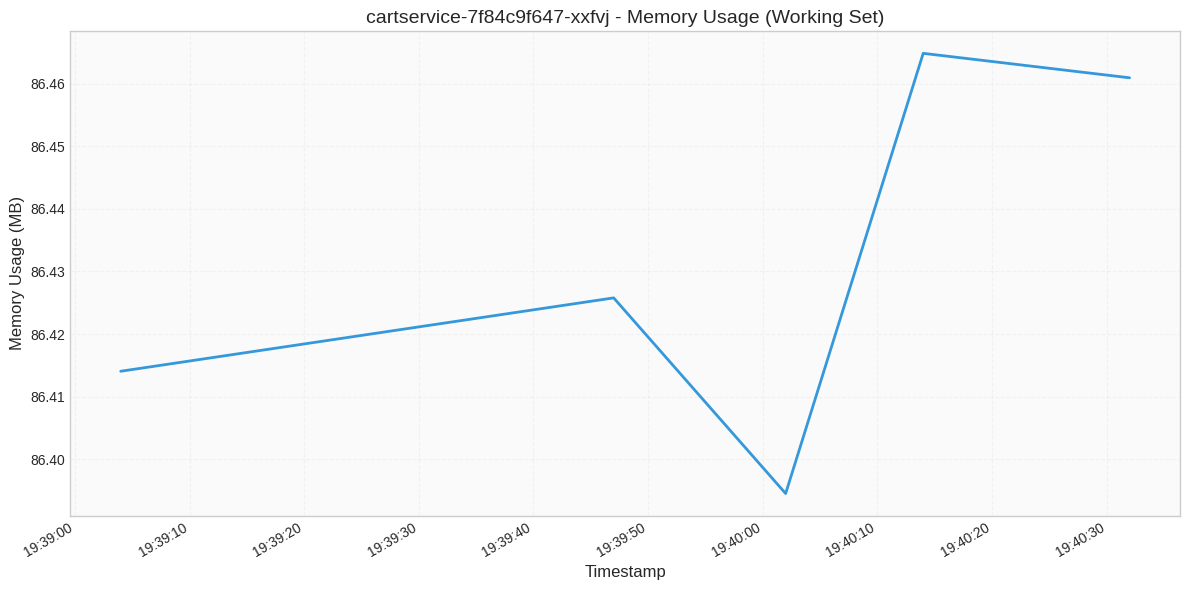

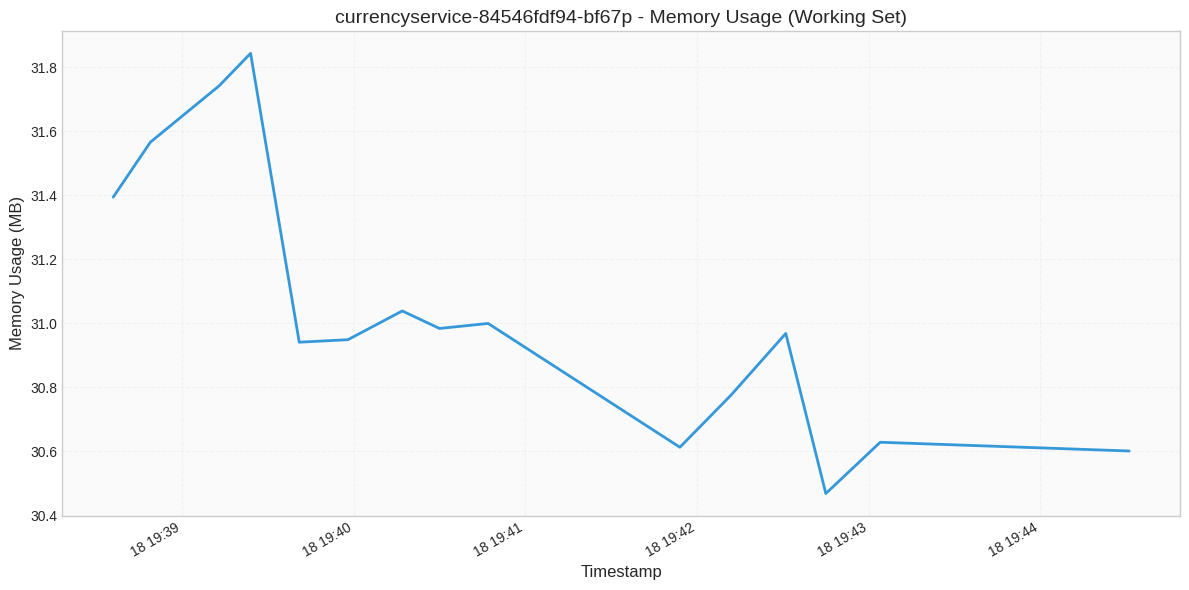

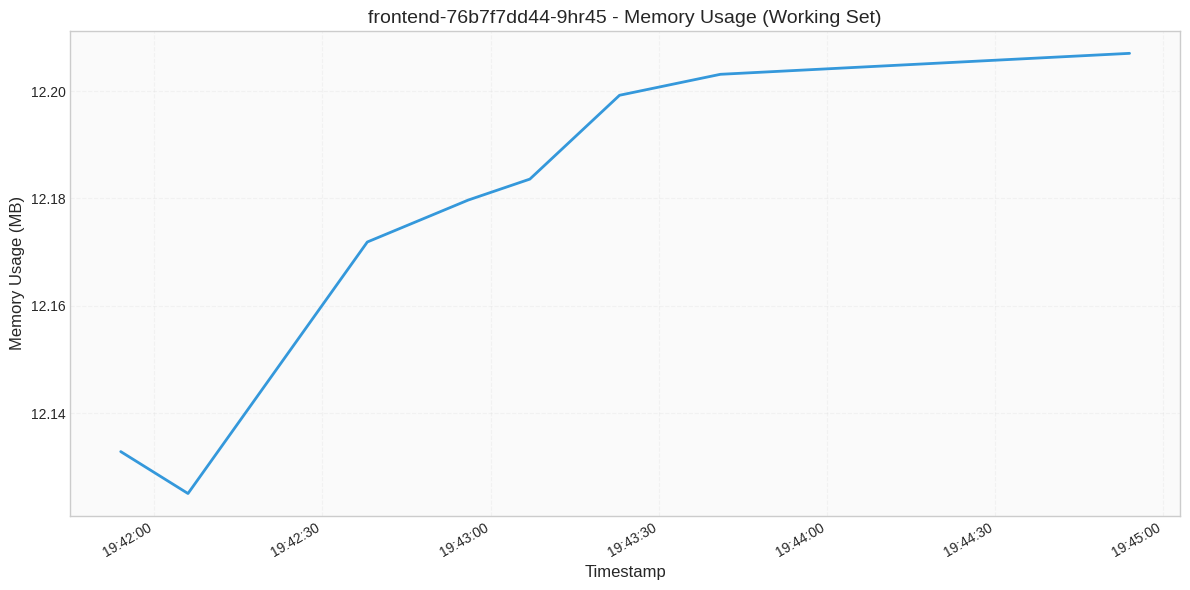

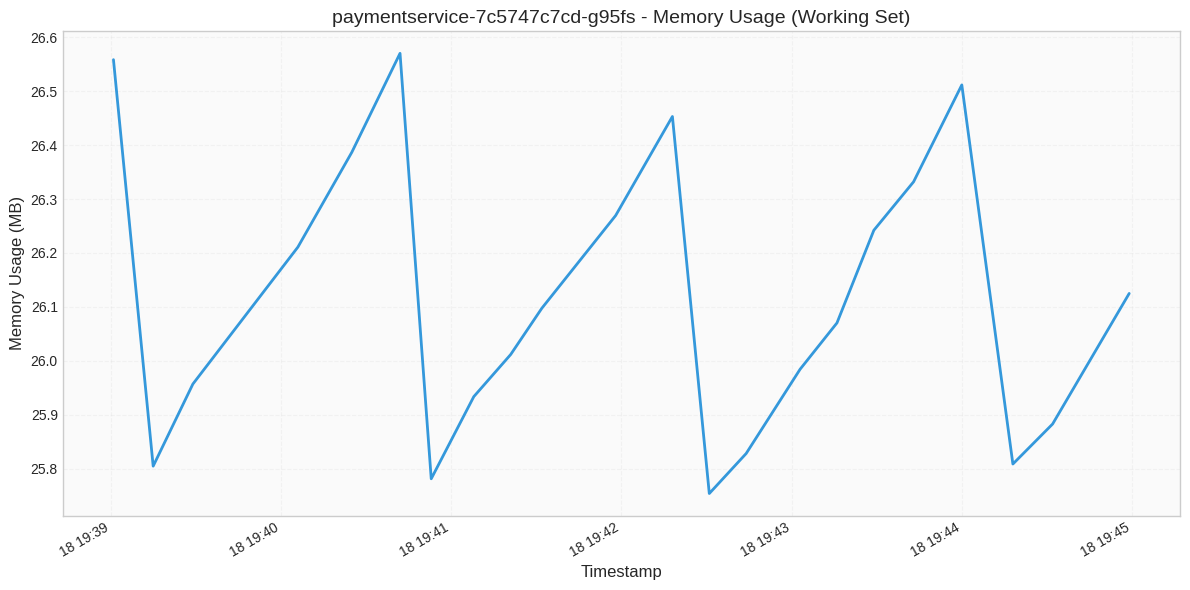

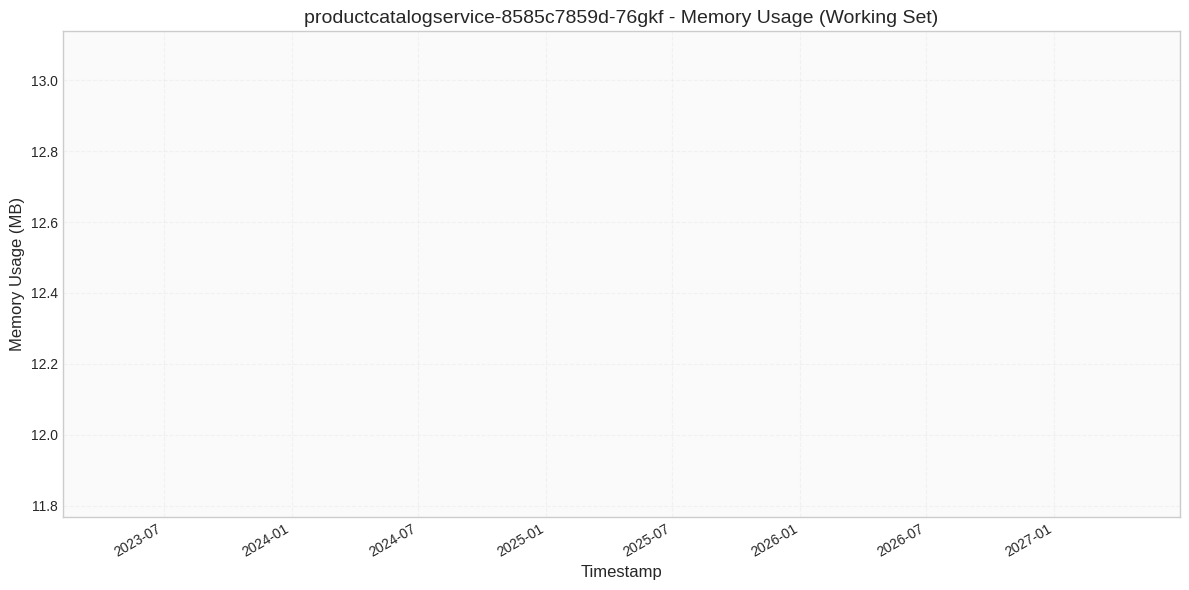

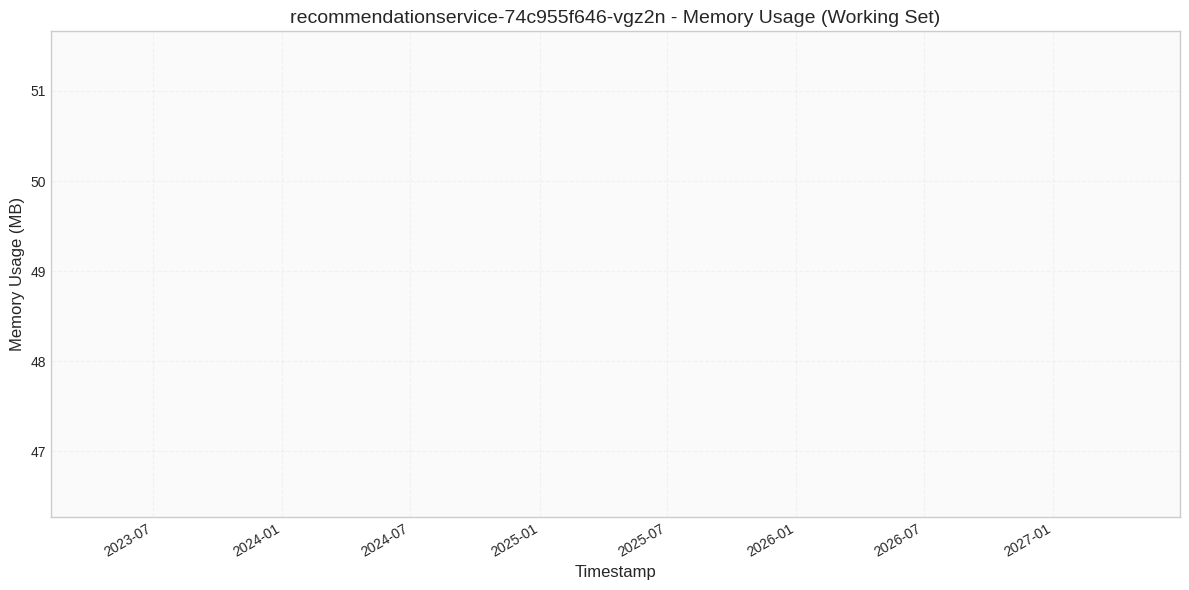

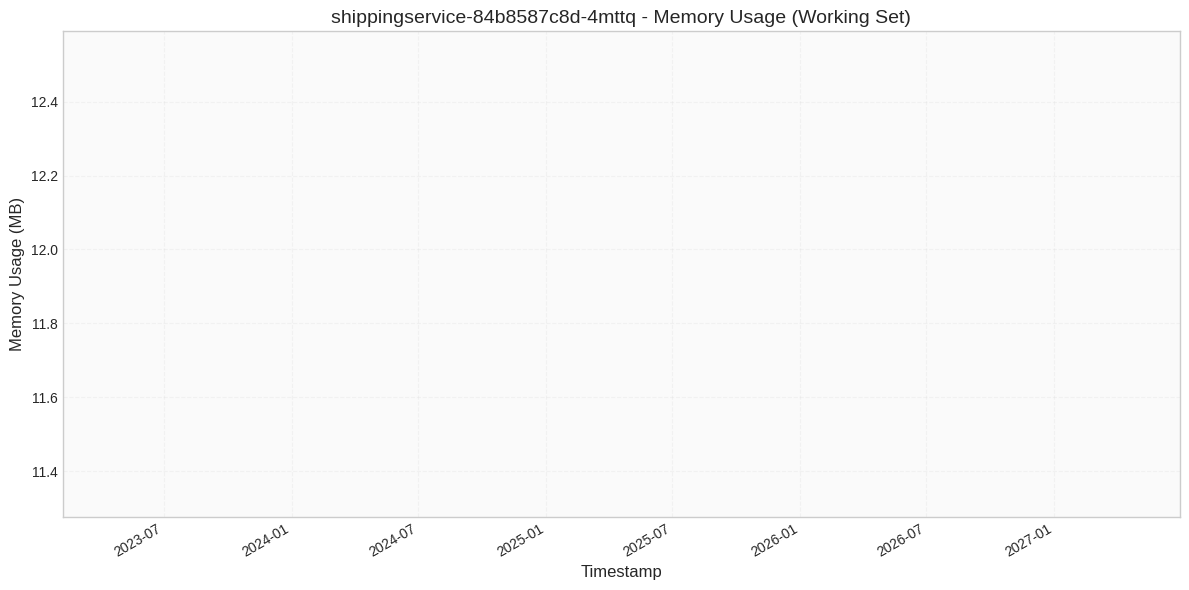

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure timestamp is in datetime format
if 'timestamp' not in mergedData2.columns:
    mergedData2 = mergedData2.reset_index()
mergedData2['timestamp'] = pd.to_datetime(mergedData2['timestamp'])

# 2. Remove NaN values before processing
mergedData2 = mergedData2.dropna(subset=['container_memory_working_set_bytes'])

# 3. Extract microservice name from pod name
mergedData2['microservice'] = mergedData2['pod'].str.extract(r'([a-zA-Z]+)-')[0]

# 4. Convert bytes to MB for better readability
mergedData2['memory_mb'] = mergedData2['container_memory_working_set_bytes'] / (1024 * 1024)

# 5. Sort timestamps before grouping
mergedData2 = mergedData2.sort_values(by='timestamp')

# 6. Group by pod and timestamp, taking latest value per timestamp
grouped_data2 = mergedData2.groupby(['pod', 'timestamp']).last().reset_index()

# 7. Plot memory usage for each pod separately
for pod in grouped_data2['pod'].unique():
    plt.figure(figsize=(12, 6))

    pod_data = grouped_data2[grouped_data2['pod'] == pod]

    plt.plot(pod_data['timestamp'],
             pod_data['memory_mb'],
             color='#3498db',  # Blue color for distinction
             linewidth=2)

    plt.title(f'{pod} - Memory Usage (Working Set)', fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('Memory Usage (MB)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Format x-axis
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # Save and show
    plt.savefig(f'{pod}_memory_usage_working_set.png', dpi=300, bbox_inches='tight')
    plt.show()

In [51]:
# container_memory_failures_total

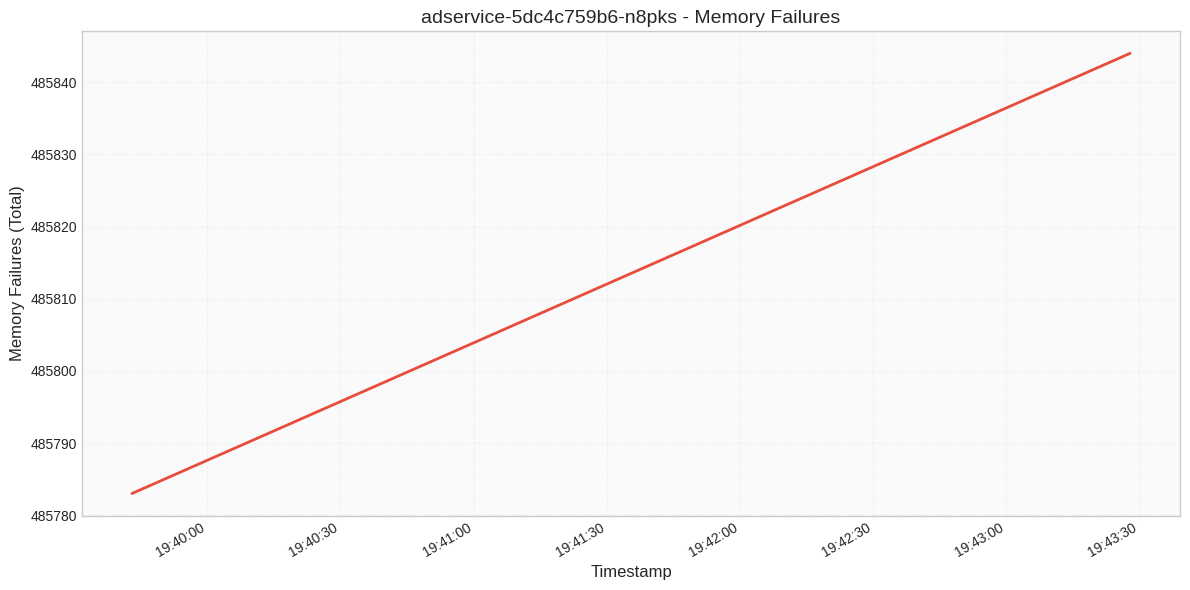

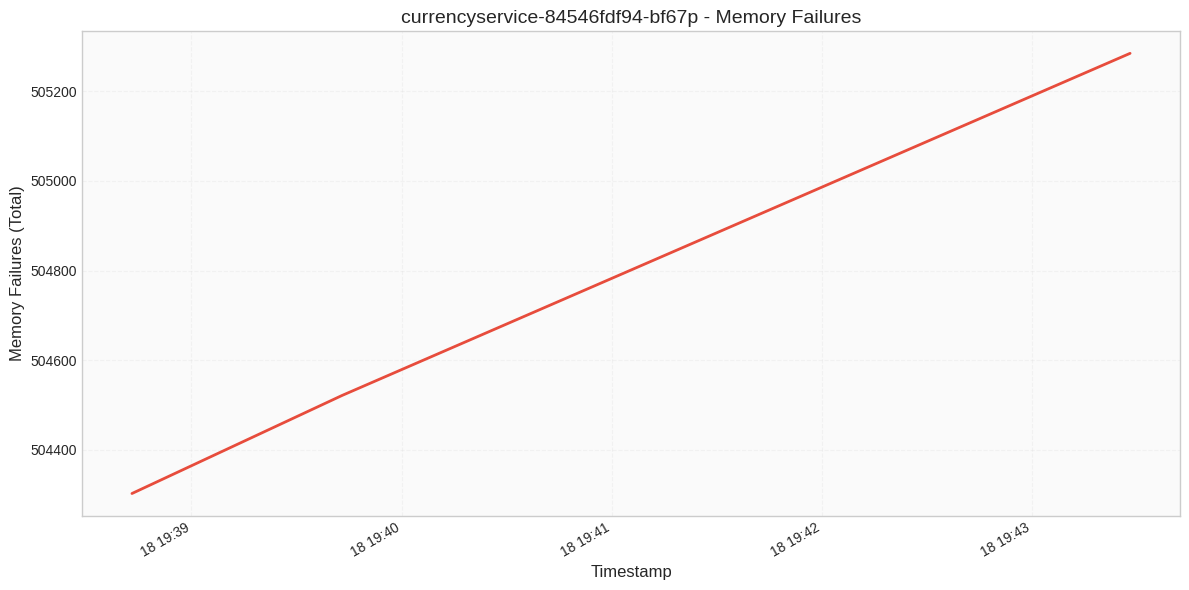

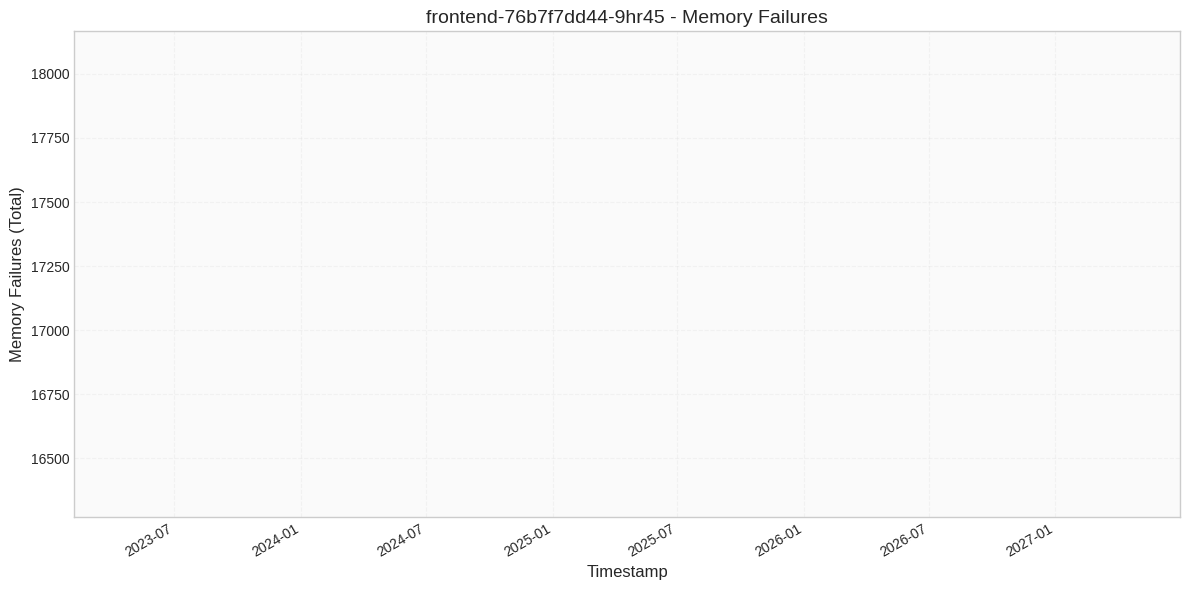

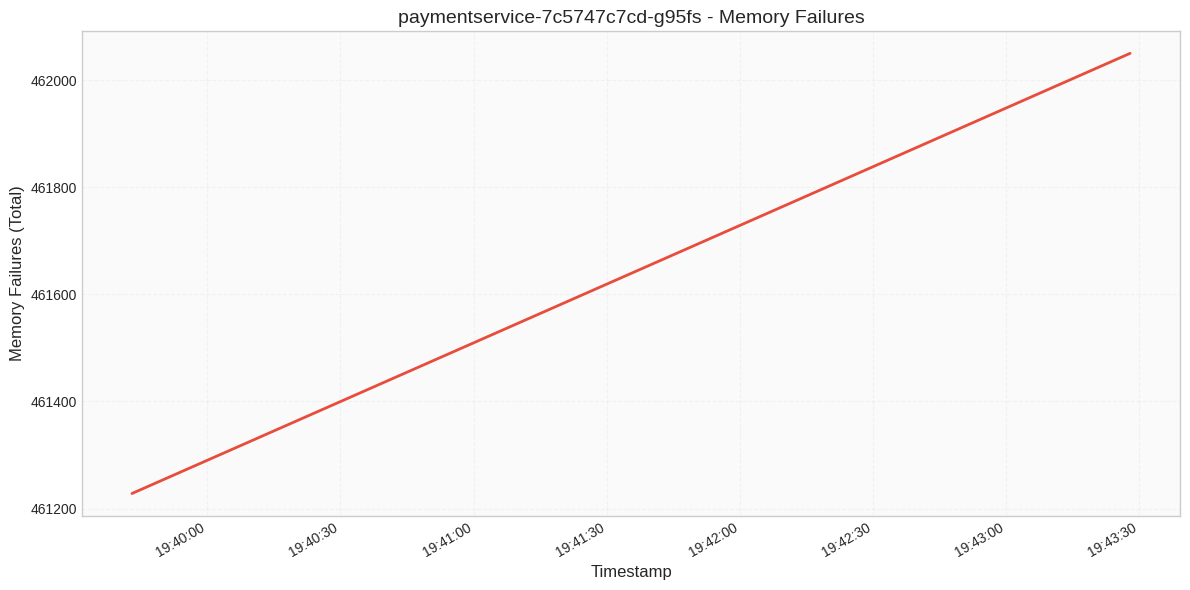

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure timestamp is in datetime format
if 'timestamp' not in mergedData4.columns:
    mergedData4 = mergedData4.reset_index()
mergedData4['timestamp'] = pd.to_datetime(mergedData4['timestamp'])

# 2. Remove NaN values before processing
mergedData4 = mergedData4.dropna(subset=['container_memory_failures_total'])

# 3. Extract microservice name from pod name
mergedData4['microservice'] = mergedData4['pod'].str.extract(r'([a-zA-Z]+)-')[0]

# 4. Sort timestamps before grouping
mergedData4 = mergedData4.sort_values(by='timestamp')

# 5. Group by pod and timestamp, keeping the latest value per timestamp
grouped_data4 = mergedData4.groupby(['pod', 'timestamp']).sum().reset_index()

# 6. Plot memory failures for each pod separately
for pod in grouped_data4['pod'].unique():
    plt.figure(figsize=(12, 6))

    pod_data = grouped_data4[grouped_data4['pod'] == pod]

    plt.plot(pod_data['timestamp'],
             pod_data['container_memory_failures_total'],
             color='#e74c3c',  # Red color
             linewidth=2)

    plt.title(f'{pod} - Memory Failures', fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('Memory Failures (Total)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Format x-axis
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # Save and show
    plt.savefig(f'{pod}_memory_failures.png', dpi=300, bbox_inches='tight')
    plt.show()

In [53]:
 # Failure Rate (Failures/Second)

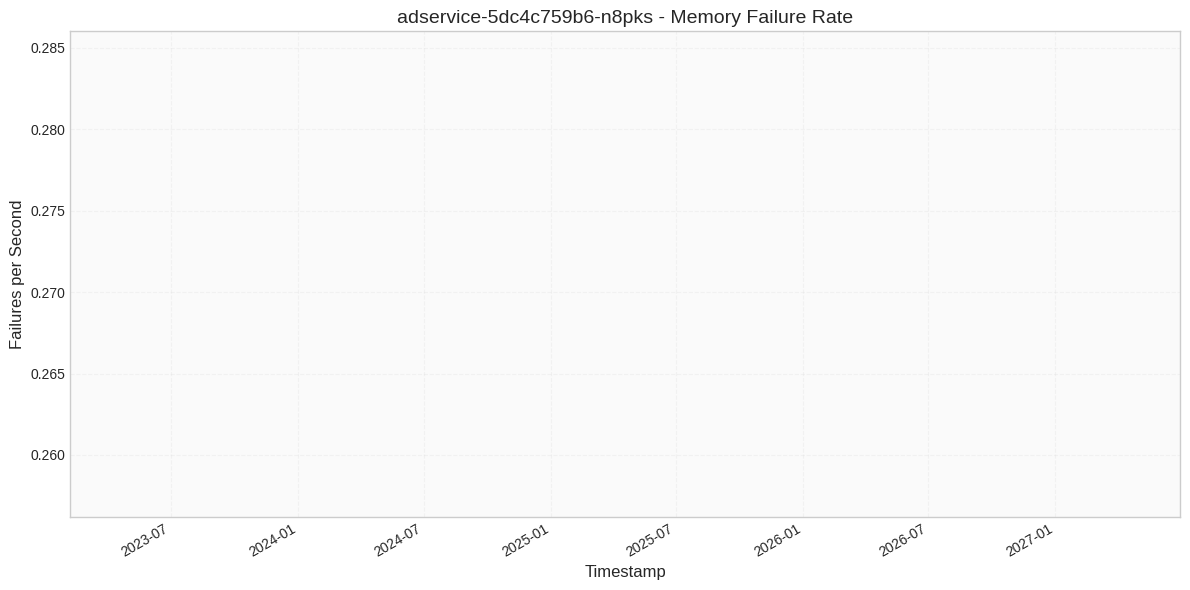

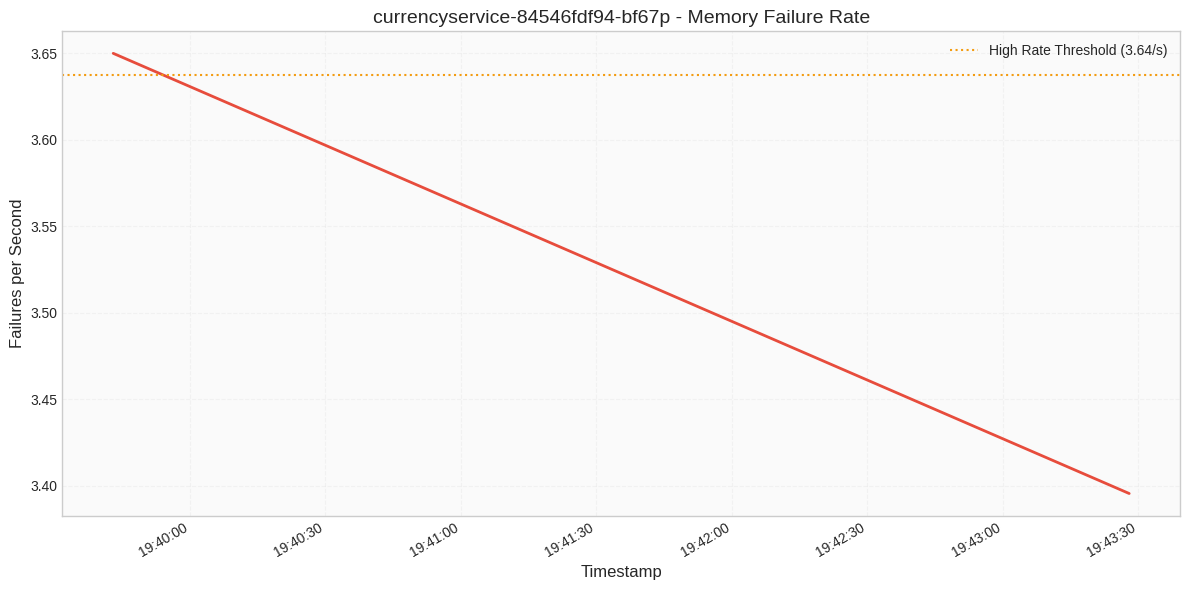

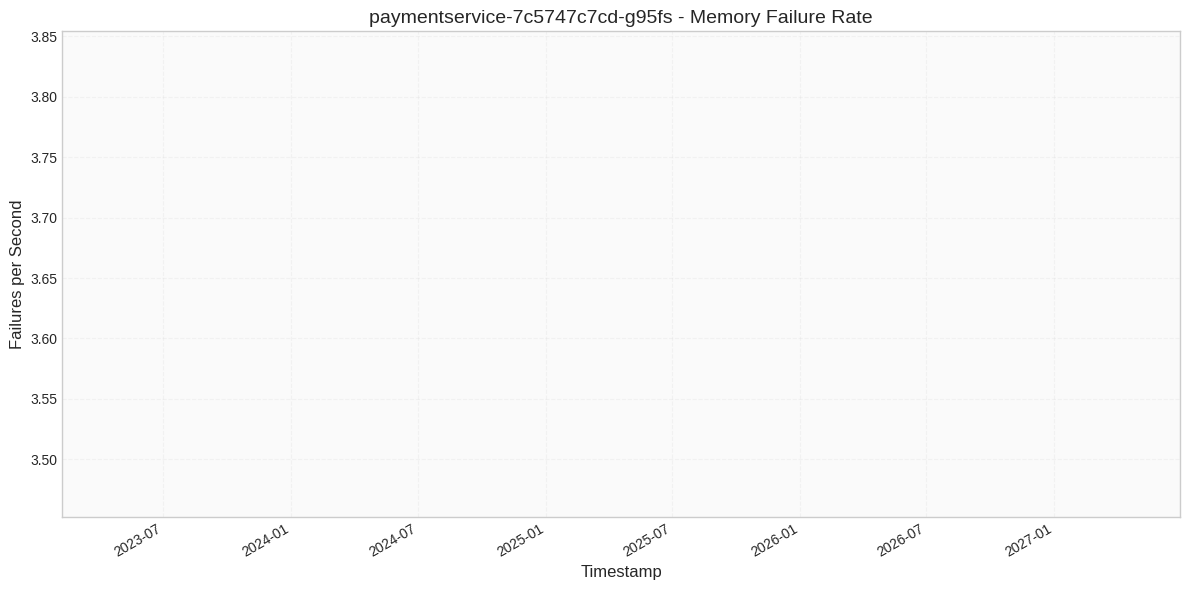

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Ensure timestamp is in datetime format
if 'timestamp' not in mergedData4.columns:
    mergedData4 = mergedData4.reset_index()
mergedData4['timestamp'] = pd.to_datetime(mergedData4['timestamp'])

# 2. Remove NaN values before processing
mergedData4 = mergedData4.dropna(subset=['container_memory_failures_total'])

# 3. Extract microservice name from pod name
mergedData4['microservice'] = mergedData4['pod'].str.extract(r'([a-zA-Z]+)-')[0]

# 4. Sort timestamps before grouping
mergedData4 = mergedData4.sort_values(by='timestamp')

# 5. Calculate FAILURE RATE (failures/second)
def calculate_failure_rate(group):
    group = group.sort_values('timestamp').copy()
    # Compute failures per second
    group['failures_per_sec'] = (
        group['container_memory_failures_total'].diff() /
        group['timestamp'].diff().dt.total_seconds()
    )
    # Drop first row (NaN from diff)
    return group.dropna()

# Apply to each pod group and reset index
failure_rates = mergedData4.groupby('pod', group_keys=False).apply(calculate_failure_rate).reset_index(drop=True)

# 6. Group by pod and timestamp (sum if duplicates exist)
grouped_rates = failure_rates.groupby(['pod', 'timestamp'], as_index=False).sum()

# 7. Plot failure rate for each pod
for pod in grouped_rates['pod'].unique():
    plt.figure(figsize=(12, 6))

    pod_data = grouped_rates[grouped_rates['pod'] == pod]

    plt.plot(pod_data['timestamp'],
             pod_data['failures_per_sec'],
             color='#e74c3c',  # Red color for alerts
             linewidth=2)

    plt.title(f'{pod} - Memory Failure Rate', fontsize=14)
    plt.xlabel('Timestamp', fontsize=12)
    plt.ylabel('Failures per Second', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    # Highlight spikes (optional)
    if len(pod_data) > 1:  # Only calculate threshold if we have enough data
        threshold = pod_data['failures_per_sec'].quantile(0.95)  # 95th percentile
        plt.axhline(y=threshold, color='#f39c12', linestyle=':',
                    label=f'High Rate Threshold ({threshold:.2f}/s)')
        plt.legend()

    # Format x-axis
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

    # Save and show
    plt.savefig(f'{pod}_memory_failure_rate.png', dpi=300, bbox_inches='tight')
    plt.show()